# Exploring the data
* Importar los datasets
* Visualización inicial de los mismos
* Conteo de líneas de entrada por cadad uno.

## Importar los datasets

In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
with open('dataset/categories.json', encoding='utf-8')  as cat:
    categorias = json.load(cat)

In [3]:
with open('dataset/products.json', encoding='utf-8') as prod:
    products = json.load(prod)

In [4]:
with open('dataset/stores.json', encoding='utf-8')  as sto:
    stores = json.load(sto)

## Visualización inicial de los mismos

In [5]:
for i, prod in enumerate(products):
    if i == 2:
        break
    name = prod['name']
    print(f'\n¡¡¡¡Datos del producto {name}!!!!')
    for key, value in prod.items():
        print(key, ":", value)


¡¡¡¡Datos del producto Duracell - AAA Batteries (4-Pack)!!!!
sku : 43900
name : Duracell - AAA Batteries (4-Pack)
type : HardGood
price : 5.49
upc : 041333424019
category : [{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'}, {'id': 'pcmcat248700050021', 'name': 'Housewares'}, {'id': 'pcmcat303600050001', 'name': 'Household Batteries'}, {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}]
shipping : 5.49
description : Compatible with select electronic devices; AAA size; DURALOCK Power Preserve technology; 4-pack
manufacturer : Duracell
model : MN2400B4Z
url : http://www.bestbuy.com/site/duracell-aaa-batteries-4-pack/43900.p?id=1051384074145&skuId=43900&cmp=RMXCC
image : http://img.bbystatic.com/BestBuy_US/images/products/4390/43900_sa.jpg

¡¡¡¡Datos del producto Duracell - AA 1.5V CopperTop Batteries (4-Pack)!!!!
sku : 48530
name : Duracell - AA 1.5V CopperTop Batteries (4-Pack)
type : HardGood
price : 5.49
upc : 041333415017
category : [{'id': 'pcmcat312300050015', 

In [6]:
for i, sto in enumerate(stores):
    if i == 2:
        break
    name = sto['name']
    print(f'\n¡¡¡¡Datos del store {name}!!!!')
    for key, value in sto.items():
        print(key, ":", value)


¡¡¡¡Datos del store Mall of America!!!!
id : 1000
type : BigBox
name : Mall of America
address : 340 W Market
address2 : 
city : Bloomington
state : MN
zip : 55425
location : {'lat': 44.85466, 'lon': -93.24565}
hours : Mon: 10-9:30; Tue: 10-9:30; Wed: 10-9:30; Thurs: 10-9:30; Fri: 10-9:30; Sat: 10-9:30; Sun: 11-7
services : ['Geek Squad Services', 'Best Buy Mobile', 'Best Buy For Business', 'Apple Shop', 'Hablamos Español', 'Camera Experience Shop ', 'Electronics Recycling', 'Magnolia Home Theater', 'Samsung Experience Shop', 'Windows Store']

¡¡¡¡Datos del store Tempe Marketplace!!!!
id : 1002
type : BigBox
name : Tempe Marketplace
address : 1900 E Rio Salado Pkwy
address2 : 
city : Tempe
state : AZ
zip : 85281
location : {'lat': 33.430729, 'lon': -111.89966}
hours : Mon: 10-9; Tue: 10-9; Wed: 10-9; Thurs: 10-9; Fri: 10-10; Sat: 10-10; Sun: 10-8
services : ['Windows Store', 'Geek Squad Services', 'Best Buy Mobile', 'Best Buy For Business', 'Apple Shop', 'Electronics Recycling', 'Sams

In [7]:
for i, cat in enumerate(categorias):
    if i == 2:
        break
    name = cat['name']
    print(f'\n¡¡¡¡Datos de la categoria {name}!!!!')
    for key, value in cat.items():
        print(key, ":", value)


¡¡¡¡Datos de la categoria Gift Ideas!!!!
id : abcat0010000
name : Gift Ideas
path : [{'id': 'abcat0010000', 'name': 'Gift Ideas'}]
subCategories : [{'id': 'pcmcat140000050035', 'name': 'Capturing Photos & Videos'}, {'id': 'pcmcat140000050036', 'name': 'Listening to Digital Music'}, {'id': 'pcmcat140000050037', 'name': 'Computing Made Easy'}, {'id': 'pcmcat140000050039', 'name': 'Simple GPS Navigation'}, {'id': 'pcmcat140000050040', 'name': 'Playing Video Games'}, {'id': 'pcmcat140000050041', 'name': 'Watching HDTV'}, {'id': 'pcmcat140000050042', 'name': 'Enjoying Favorite Movies'}, {'id': 'abcat0012000', 'name': 'Him'}, {'id': 'abcat0011000', 'name': 'Her'}, {'id': 'abcat0013000', 'name': 'Teens'}, {'id': 'abcat0014000', 'name': 'Kids'}, {'id': 'pcmcat84000050001', 'name': 'Anniversaries'}, {'id': 'pcmcat84000050004', 'name': 'Baby Showers'}, {'id': 'pcmcat94300050028', 'name': 'Birthdays'}, {'id': 'pcmcat84000050002', 'name': 'Business Gifts'}, {'id': 'pcmcat84000050003', 'name': 'Gr

## Conteo de líneas de entrada por cadad uno.

In [8]:
print(f" Cantidad de Productos {len(products)}\n Cantidad de Tiendas {len(stores)}\n cantidad de Categorías {len(categorias)}")

 Cantidad de Productos 51646
 Cantidad de Tiendas 1565
 cantidad de Categorías 4584


# Análisis de descripciones
* Conteo de caracteres, de palabras de oraciones y caracteres especiales.
* Normalización
* Conteo de palabras más frecuentes y palabras menos frecuentes.
* Conteo de ngramas más frecuentes y menos frecuentes
* Conteo de palabras de una sola letra

## Análisis inicial

In [9]:
# Verificando si sku es único para cada ejemplo.
skus = []
for i, prod in enumerate(products):
    name = prod['name']
    for key, value in prod.items():
        if key == 'sku':
            skus.append(value)

buleano = len(set(skus))==len(products)
if buleano:
    text_bul = 'VERDADERO'
else:
    text_bul = 'FALSO'
print(f'Es {text_bul} que sku son valores únicos por cada entrada del dataset products.')

Es VERDADERO que sku son valores únicos por cada entrada del dataset products.


In [10]:
# Extraemos cada identificador sku y cada descripción en un dataframe.
products_list = []
for prod in products:
    var = [prod['sku'], prod['name'], prod['description'], prod['category']]
    products_list.append(var)

products_df = pd.DataFrame(products_list, columns=['Skus', 'Name', 'Descriptions', 'Category'])
products_df.head()

,Skus,Name,Descriptions,Category
0,43900,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
2,127687,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
3,150115,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
4,185230,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."


In [11]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51646 entries, 0 to 51645
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Skus          51646 non-null  int64 
 1   Name          51645 non-null  object
 2   Descriptions  51646 non-null  object
 3   Category      51646 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [12]:
# Como solo una línea tiene valores faltantes, la eliminamos y no afectará al modelo final.
products_df.dropna(inplace=True)
products_df.reset_index(drop=True)
products_df.head()

,Skus,Name,Descriptions,Category
0,43900,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
2,127687,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
3,150115,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
4,185230,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."


In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51645
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Skus          51645 non-null  int64 
 1   Name          51645 non-null  object
 2   Descriptions  51645 non-null  object
 3   Category      51645 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [14]:
products_descri_df = products_df.drop(['Name', 'Category'], axis=1)
products_name_df = products_df.drop(['Descriptions', 'Category'], axis=1)
products_categories_df = products_df.drop(['Name', 'Descriptions'], axis=1)

## Conteo de caracteres, de palabras de oraciones y caracteres especiales.

### Conteo de caracteres

In [15]:
products_descri_df['Char Count'] = products_descri_df['Descriptions'].apply(len)
products_descri_df.head()

,Skus,Descriptions,Char Count
0,43900,Compatible with select electronic devices; AAA...,95
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112
2,127687,Compatible with select electronic devices; AA ...,94
3,150115,4-pack AA alkaline batteries; battery tester i...,53
4,185230,Compatible with select electronic devices; C s...,93


### Conteo de palabras

In [16]:
def cant_palabras(oracion):
    palabras = oracion.split()
    cantidad = len(palabras)
    return cantidad
products_descri_df['Word Count'] = products_descri_df['Descriptions'].apply(cant_palabras)
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count
0,43900,Compatible with select electronic devices; AAA...,95,12
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15
2,127687,Compatible with select electronic devices; AA ...,94,12
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7
4,185230,Compatible with select electronic devices; C s...,93,12


### Conteo de oraciones

In [17]:
import nltk
from nltk.tokenize import sent_tokenize
def cant_oraciones(descripcion):
    cant_oracion = len(sent_tokenize(descripcion))
    return cant_oracion

products_descri_df['Sentence Count'] = products_descri_df['Descriptions'].apply(cant_oraciones)
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count
0,43900,Compatible with select electronic devices; AAA...,95,12,1
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15,1
2,127687,Compatible with select electronic devices; AA ...,94,12,1
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7,1
4,185230,Compatible with select electronic devices; C s...,93,12,1


### Conteo de caracteres especiales

In [18]:
products_descri_df['Hashtag Count'] = products_descri_df['Descriptions'].map(lambda x: x.count("#"))
products_descri_df['@ Count'] = products_descri_df['Descriptions'].map(lambda x: x.count("@"))
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Compatible with select electronic devices; AAA...,95,12,1,0,0
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15,1,0,0
2,127687,Compatible with select electronic devices; AA ...,94,12,1,0,0
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7,1,0,0
4,185230,Compatible with select electronic devices; C s...,93,12,1,0,0


### Gráfico de lo desarrollado.

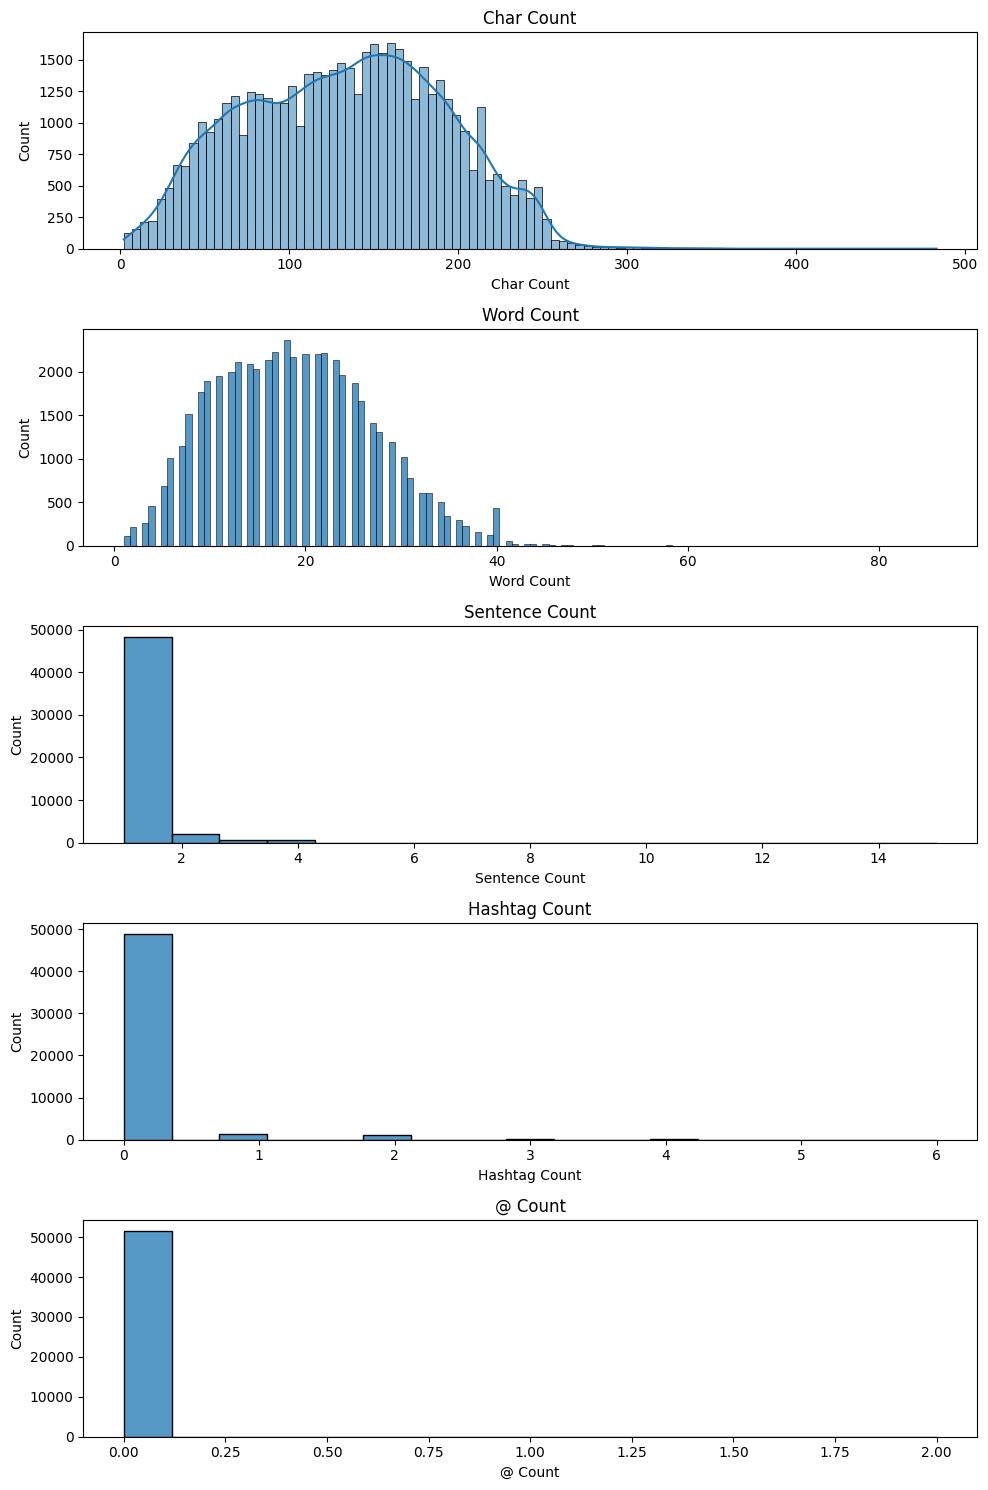

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Definir las columnas a graficar
columnas = ['Char Count', 'Word Count', 'Sentence Count', 'Hashtag Count', '@ Count']

# Crear gráficos KDE para cada columna y asignarlos a los subgráficos
for i, columna in enumerate(columnas):
    aux = i==0
    sns.histplot(data=products_descri_df, x=columna, ax=axes[i], kde=aux)
    axes[i].set_title(columna)

# Ajustar los espacios entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Normalización

In [20]:
from src import text_normalizer
stop_words = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pct3x\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pct3x\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pct3x\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Compatible with select electronic devices; AAA...,95,12,1,0,0
1,48530,Long-lasting energy; DURALOCK Power Preserve t...,112,15,1,0,0
2,127687,Compatible with select electronic devices; AA ...,94,12,1,0,0
3,150115,4-pack AA alkaline batteries; battery tester i...,53,7,1,0,0
4,185230,Compatible with select electronic devices; C s...,93,12,1,0,0


In [29]:
products_descri_df['Descriptions'] = text_normalizer.normalize_corpus(products_descri_df['Descriptions'], stopwords=stop_words, text_lemmatization=True)
products_descri_df.head()

c:\Users\pct3x\OneDrive\Documentos\AnyoneAI\Final Project\e_commerce_categorization\src\text_normalizer.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  texto = BeautifulSoup(text, 'html.parser')


,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,compatible select electronic device aaa size d...,95,12,1,0,0
1,48530,long last energy duralock power preserve techn...,112,15,1,0,0
2,127687,compatible select electronic device aa size du...,94,12,1,0,0
3,150115,pack aa alkaline battery battery tester include,53,7,1,0,0
4,185230,compatible select electronic device c size dur...,93,12,1,0,0


In [30]:
# Guardamos para no tener que pasar por lo mismo
products_descri_df.to_csv('dataset/prod_descri_normalized.csv',index=False)

In [22]:
# leemos para no tener que pasar por lo mismo.
products_descri_df = pd.read_csv('dataset/prod_descri_normalized.csv')
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,compatible select electronic device aaa size d...,95,12,1,0,0
1,48530,long last energy duralock power preserve techn...,112,15,1,0,0
2,127687,compatible select electronic device aa size du...,94,12,1,0,0
3,150115,pack aa alkaline battery battery tester include,53,7,1,0,0
4,185230,compatible select electronic device c size dur...,93,12,1,0,0


## Conteo de palabras más frecuentes y palabras menos frecuentes.
* Creación de un corpus unidimensional a fin de realizar los conteos.

### Creación de un corpus unidimensional a fin de realizar los conteos.

In [23]:
corpus = [word for i in products_descri_df['Descriptions'].str.split().values.tolist() for word in i if (word not in stop_words)]

In [24]:
corpus[0:10]

['compatible',
 'select',
 'electronic',
 'device',
 'aaa',
 'size',
 'duralock',
 'power',
 'preserve',
 'technology']

In [25]:
len(corpus)

803388

In [26]:
len(set(corpus))

18157

### Análisis de palabras más frecuentes

In [27]:
from nltk.probability import FreqDist
most_common = FreqDist(corpus).most_common(n=None)
most_common_df = pd.DataFrame(most_common, columns=['Word', 'Count'])
most_common_df.head()

,Word,Count
0,compatible,15683
1,design,9636
2,apple,6258
3,control,6093
4,power,5277


In [28]:
# Decidimos cuantas palabras deseamos plotear.
from nltk.probability import FreqDist
common_num = 60
most_common_plot = most_common_df[0:common_num+1].copy()
most_common_plot.head()

,Word,Count
0,compatible,15683
1,design,9636
2,apple,6258
3,control,6093
4,power,5277


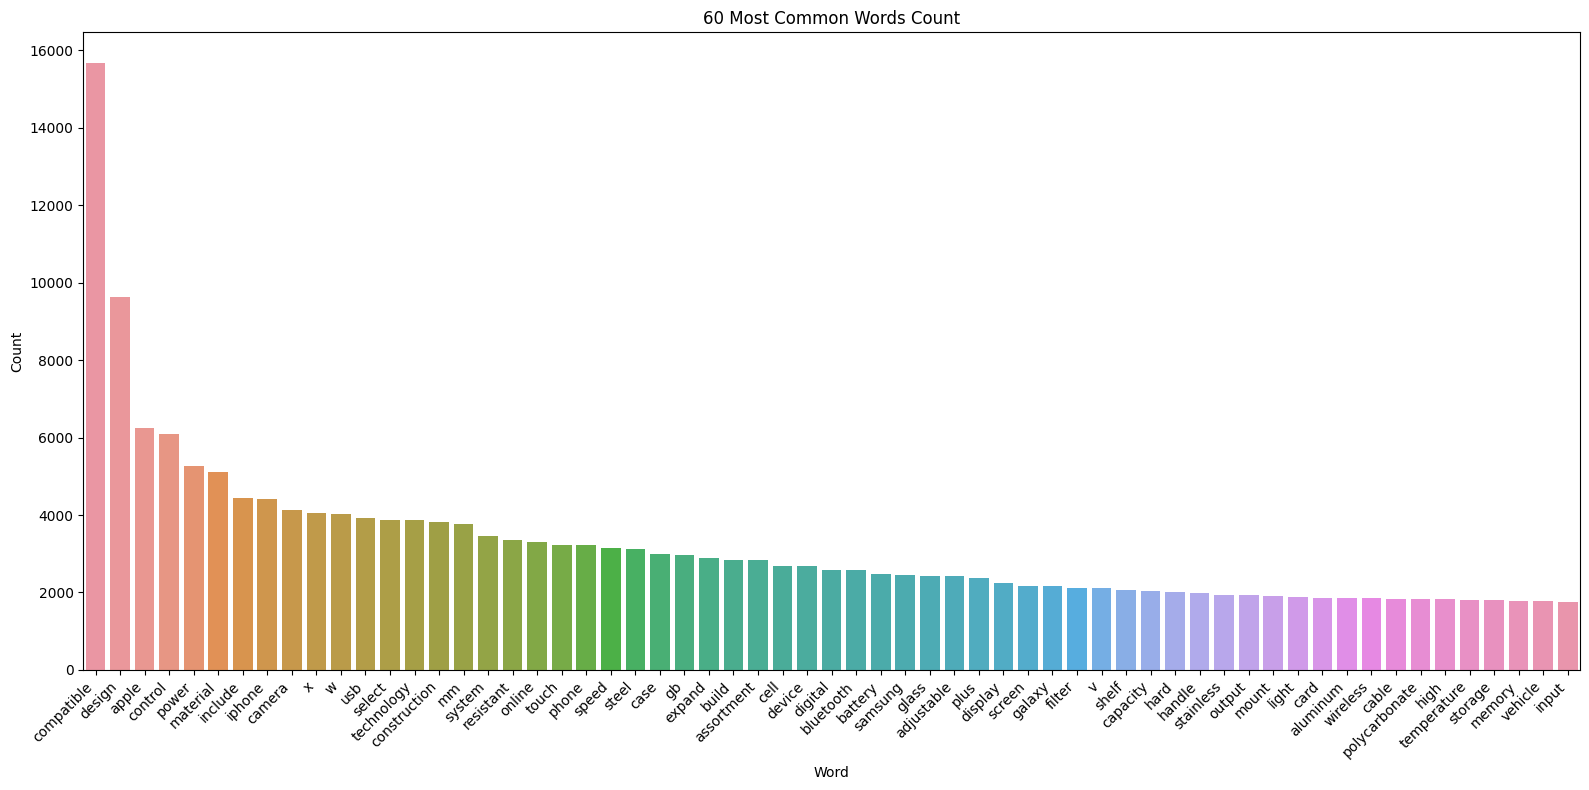

In [29]:
plt.figure(figsize=(16,8))
Title = f'{common_num} Most Common Words Count'
sns.barplot(data=most_common_plot, x='Word', y='Count')
plt.title(Title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de palabras menos frecuentes

In [30]:
least_common_df = most_common_df.sort_values('Count', ascending=True)
least_common_df.reset_index(inplace=True)
least_common_df.drop('index', axis=1, inplace=True)
least_common_df.head()

,Word,Count
0,hid,1
1,summers,1
2,wise,1
3,publication,1
4,berklee,1


In [31]:
# Decidimos cuantas palabras deseamos plotear.
common_num = 60
least_common_plot = least_common_df[0:common_num+1].copy()
least_common_plot.head()

,Word,Count
0,hid,1
1,summers,1
2,wise,1
3,publication,1
4,berklee,1


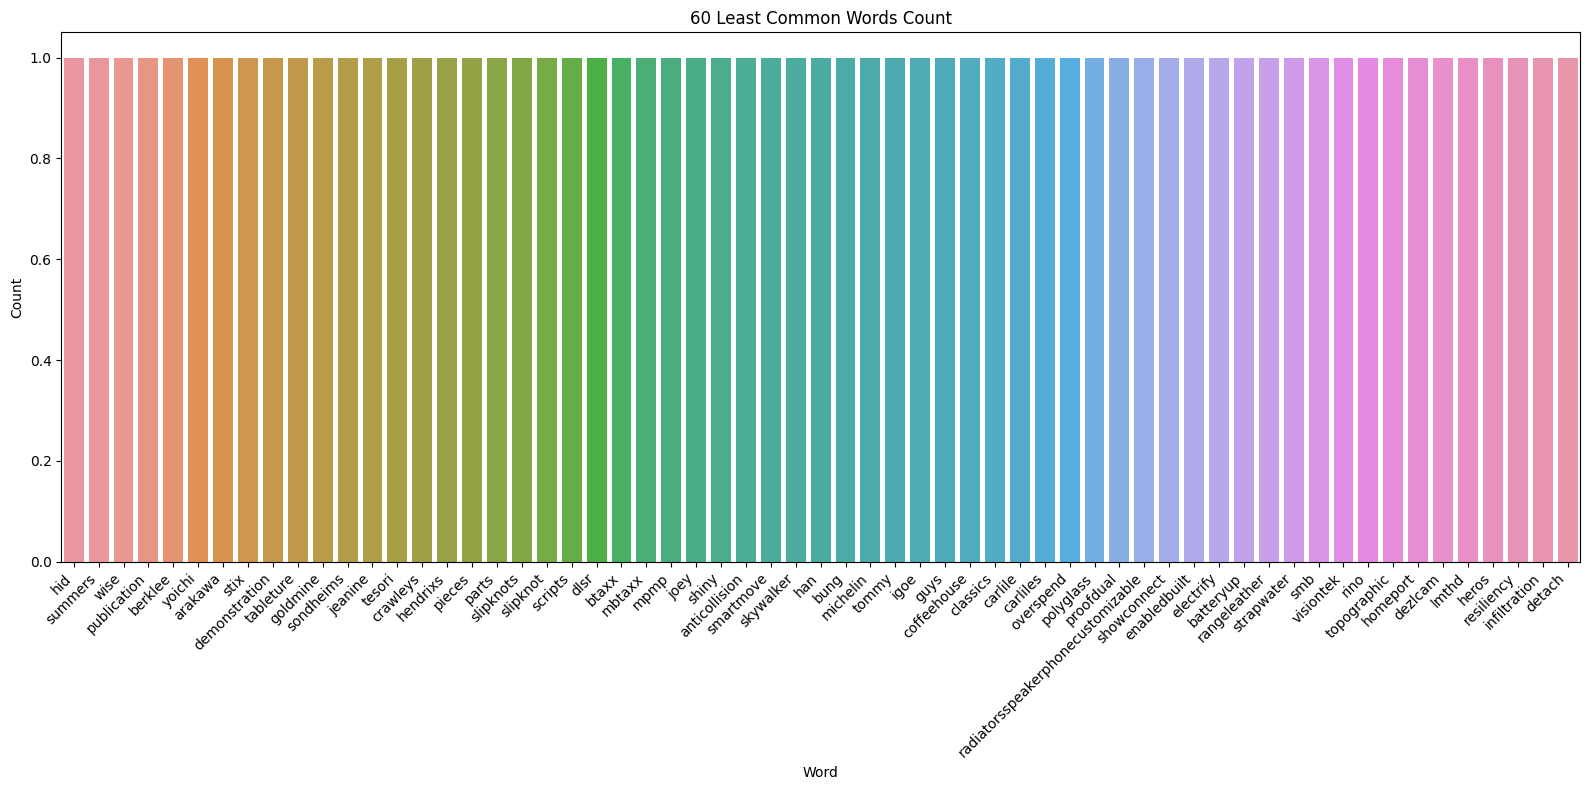

In [32]:
plt.figure(figsize=(16,8))
Title = f'{common_num} Least Common Words Count'
sns.barplot(data=least_common_plot, x='Word', y='Count')
plt.title(Title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
len(least_common_df[least_common_df['Count']==1])
# Existen 5339 palabras que solo se repiten una sola vez en todas las descripciones juntas.

5339

## Conteo de ngramas más frecuentes y menos frecuentes
* Ordenar products_df según número de palabras (Words Count)
* Determinar cantidad de números de palabras a agrupar.
* Dividir el dataframe no en partes iguales por líneas, sino en partes iguales según acumulación de palabras.
* Implementar el análisis de bigramas en cada parte.
* Implementar el análisis de trigramas en cada parte.

### Ordenar products_descri_df según número de palabras (Words Count)

In [34]:
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,compatible select electronic device aaa size d...,95,12,1,0,0
1,48530,long last energy duralock power preserve techn...,112,15,1,0,0
2,127687,compatible select electronic device aa size du...,94,12,1,0,0
3,150115,pack aa alkaline battery battery tester include,53,7,1,0,0
4,185230,compatible select electronic device c size dur...,93,12,1,0,0


In [35]:
products_descri_df.sort_values('Word Count', inplace=True, ascending=False)
products_descri_df.reset_index(inplace=True, drop=True)
products_descri_df.head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,3721708,need help set learn basic new camera camcorder...,483,86,3,0,0
1,3630079,music make happy mp player make ecstatic geek ...,377,74,6,0,0
2,3721726,music make happy mp player make ecstatic geek ...,393,73,6,0,0
3,5352025,add comfort touch work z line design task chai...,358,61,5,0,0
4,1319418,geek squad installer quickly professionally co...,338,58,2,0,0


### Determinar cantidad de números de palabras a agrupar.

In [36]:
tot_palabras = products_descri_df['Word Count'].sum()
tot_palabras

970414

In [37]:
target_palabras = tot_palabras//8
target_palabras

121301

### Dividir el dataframe no en partes iguales por líneas, sino en partes iguales según acumulación de palabras.

In [38]:
dataframe_list = []

current_sum = 0
current_dataframe = pd.DataFrame(columns=products_descri_df.columns)

for index, row in products_descri_df.iterrows():
    current_sum += row['Word Count']
    current_dataframe = pd.concat([current_dataframe, pd.DataFrame(row).transpose()])

    if current_sum >= target_palabras:
        dataframe_list.append(current_dataframe)
        current_dataframe = pd.DataFrame(columns=products_descri_df.columns)
        current_sum = 0

if len(current_dataframe) > 0:
    dataframe_list.append(current_dataframe)

In [39]:
len(dataframe_list)

8

In [40]:
dataframe_list[0].head()

,Skus,Descriptions,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,3721708,need help set learn basic new camera camcorder...,483,86,3,0,0
1,3630079,music make happy mp player make ecstatic geek ...,377,74,6,0,0
2,3721726,music make happy mp player make ecstatic geek ...,393,73,6,0,0
3,5352025,add comfort touch work z line design task chai...,358,61,5,0,0
4,1319418,geek squad installer quickly professionally co...,338,58,2,0,0


### Implementar el análisis de bigramas en cada parte.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
def get_ngram_freq(n, df, argu):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=(n,n))

    bow = vec.fit_transform(df[argu])

    count_values = bow.toarray().sum(axis=0)

    ngram_freq = pd.DataFrame([(count_values[i], k) for k, i in vec.vocabulary_.items()])
    ngram_freq.columns = ["frequency", "ngram"]
    ngram_freq.sort_values(by = "frequency",  ascending = False, inplace = True)

    return ngram_freq

In [42]:
bigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    bigram_aux = get_ngram_freq(2, dafra, 'Descriptions')
    bigram_dataframe = pd.concat([bigram_dataframe, bigram_aux[0:1000]], axis=0)

bigram_dataframe.head()

,frequency,ngram
274,1161,best buy
2970,1113,gift card
2974,740,buy gift
1669,699,apple iphone
2984,386,puerto rico


In [43]:
len(bigram_dataframe)

8000

In [44]:
bigram_dataframe_grouped = bigram_dataframe.groupby('ngram').sum()
bigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
bigram_dataframe_grouped.reset_index(inplace=True)
bigram_dataframe_grouped.head()

,ngram,frequency
0,apple iphone,3952
1,compatible apple,3040
2,expand online,2830
3,online assortment,2829
4,cell phone,2481


In [45]:
bigram_dataframe_grouped.tail()

,ngram,frequency
3891,way speaker,9
3892,broil system,9
3893,legendary story,9
3894,vacuum hepa,9
3895,technology vari,9


In [46]:
len(bigram_dataframe_grouped)

3896

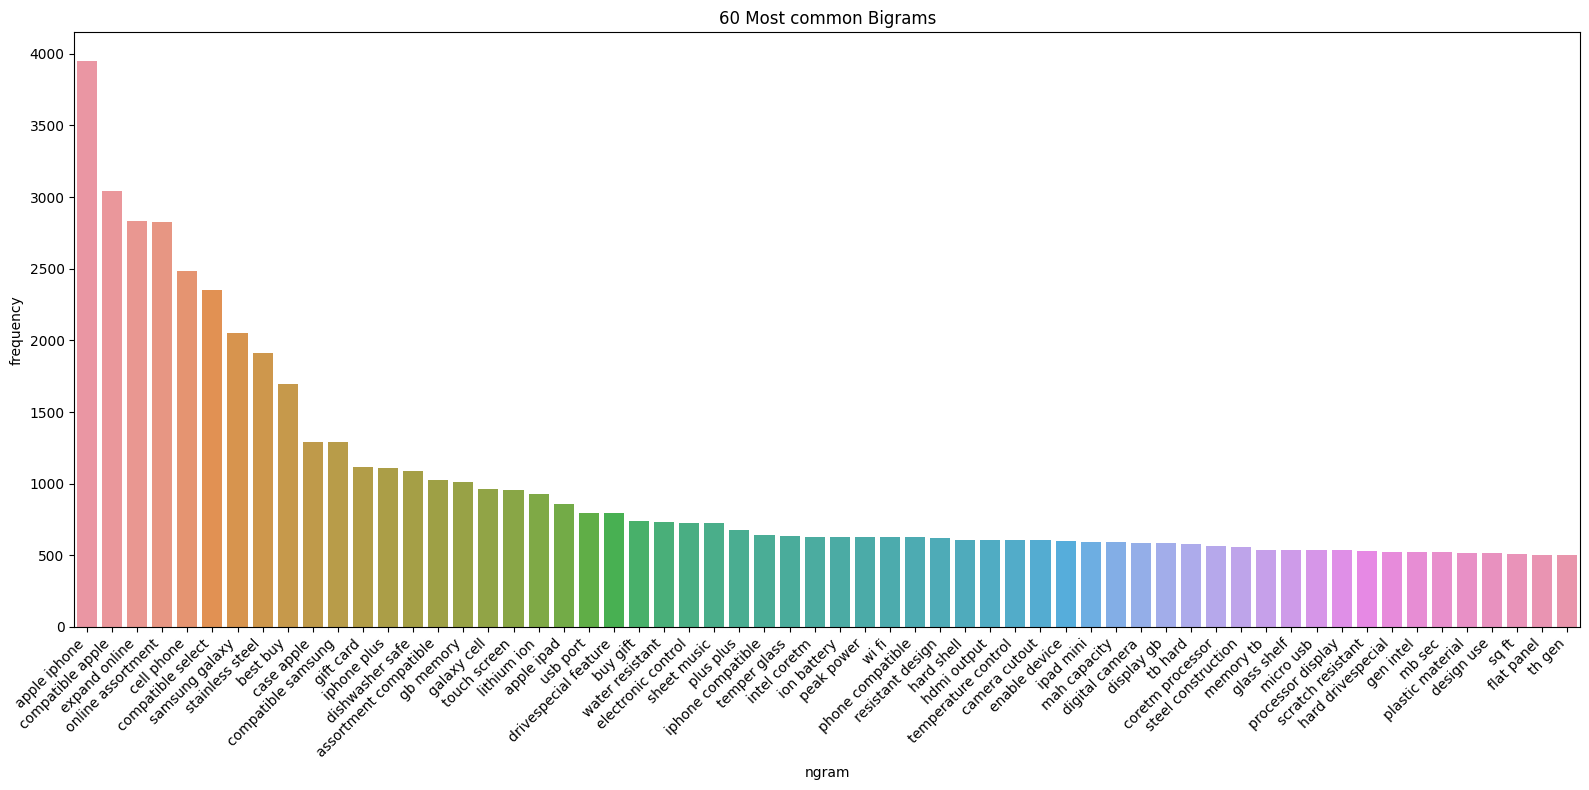

In [47]:
val_max = 60
ngram_grouped_plot = bigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Bigrams'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Implementar el análisis de trigramas en cada parte.

In [48]:
trigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    trigram_data_aux = get_ngram_freq(3, dafra, 'Descriptions')
    trigram_dataframe = pd.concat([trigram_dataframe, trigram_data_aux[0:1000]], axis=0)

trigram_dataframe.head()

,frequency,ngram
3179,740,buy gift card
3178,740,best buy gift
780,373,best buy store
3187,372,purchase online us
3188,372,online us puerto


In [49]:
len(trigram_dataframe)

8000

In [50]:
trigram_dataframe_grouped = trigram_dataframe.groupby('ngram').sum()
trigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
trigram_dataframe_grouped.reset_index(inplace=True)
trigram_dataframe_grouped.head()

,ngram,frequency
0,expand online assortment,2829
1,compatible apple iphone,2069
2,compatible samsung galaxy,1238
3,case apple iphone,1137
4,online assortment compatible,1026


In [51]:
len(trigram_dataframe_grouped)

5163

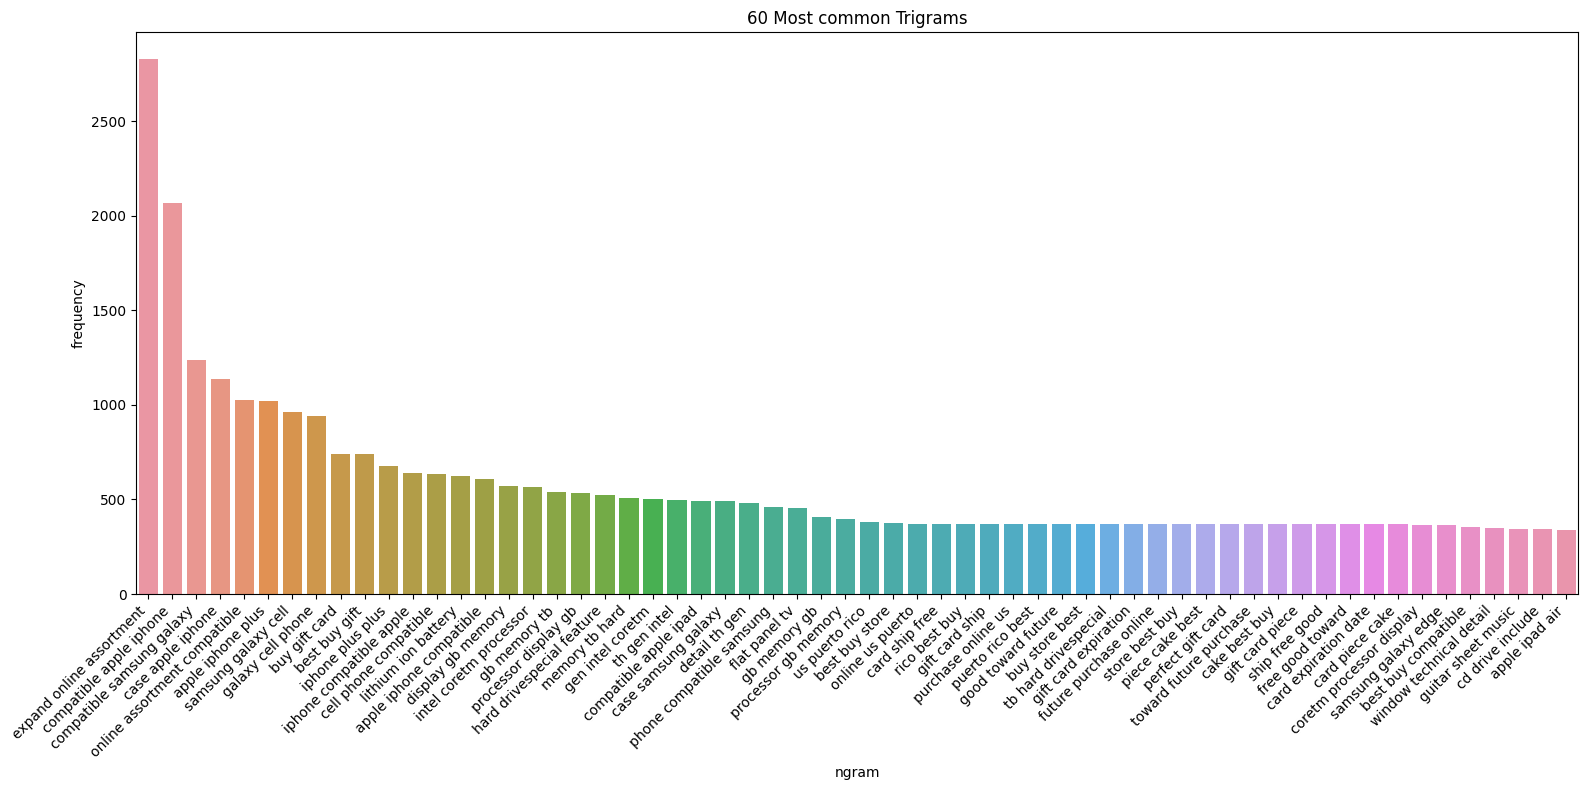

In [52]:
val_max = 60
ngram_grouped_plot = trigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Trigrams'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conteo de palabras de una sola letra.

In [53]:
most_common_df.head()

,Word,Count
0,compatible,15683
1,design,9636
2,apple,6258
3,control,6093
4,power,5277


In [54]:
most_common_single_letter = [[word, count] for word, count in zip(most_common_df['Word'], most_common_df['Count']) if len(word) == 1]
most_common_single_letter = pd.DataFrame(most_common_single_letter, columns=['Word', 'Count'])
most_common_single_letter.head()

,Word,Count
0,x,4064
1,w,4029
2,v,2106
3,g,1221
4,p,658


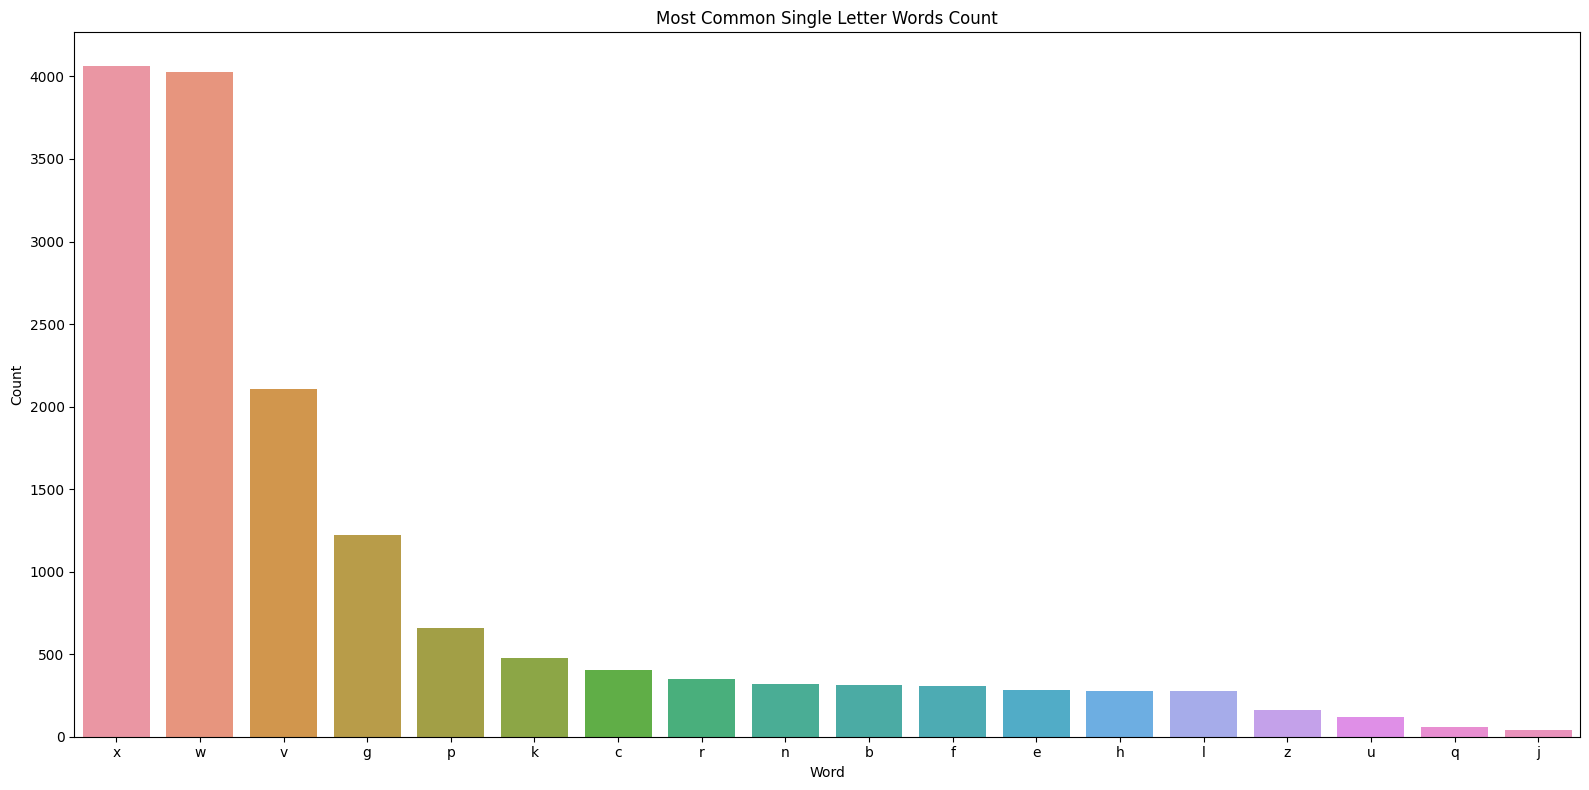

In [55]:
plt.figure(figsize=(16,8))
Title = 'Most Common Single Letter Words Count'
sns.barplot(data=most_common_single_letter, x='Word', y='Count')
plt.title(Title)
plt.tight_layout()
plt.show()

# Análisis de nombres
* Conteo de caracteres, de palabras de oraciones y caracteres especiales.
* Normalización
* Conteo de palabras más frecuentes y palabras menos frecuentes.
* Conteo de ngramas más frecuentes y menos frecuentes
* Conteo de palabras de una sola letra

### Análisis inicial

In [56]:
products_name_df.head()

,Skus,Name
0,43900,Duracell - AAA Batteries (4-Pack)
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack)
2,127687,Duracell - AA Batteries (8-Pack)
3,150115,Energizer - MAX Batteries AA (4-Pack)
4,185230,Duracell - C Batteries (4-Pack)


In [57]:
len(products_name_df)

51645

In [58]:
products_name_df.dtypes

Skus     int64
Name    object
dtype: object

In [59]:
products_name_df['Name'][0]

'Duracell - AAA Batteries (4-Pack)'

In [60]:
products_name_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51645 entries, 0 to 51645
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Skus    51645 non-null  int64 
 1   Name    51645 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.2+ MB


## Conteo de caracteres, de palabras de oraciones y caracteres especiales.

### Conteo de caracteres

In [61]:
products_name_df['Char Count'] = products_name_df['Name'].apply(len)
products_name_df.head()

,Skus,Name,Char Count
0,43900,Duracell - AAA Batteries (4-Pack),33
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47
2,127687,Duracell - AA Batteries (8-Pack),32
3,150115,Energizer - MAX Batteries AA (4-Pack),37
4,185230,Duracell - C Batteries (4-Pack),31


### Conteo de palabras

In [62]:
def cant_palabras(oracion):
    palabras = oracion.split()
    cantidad = len(palabras)
    return cantidad
products_name_df['Word Count'] = products_name_df['Name'].apply(cant_palabras)
products_name_df.head()

,Skus,Name,Char Count,Word Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7
2,127687,Duracell - AA Batteries (8-Pack),32,5
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6
4,185230,Duracell - C Batteries (4-Pack),31,5


### Conteo de oraciones

In [63]:
import nltk
from nltk.tokenize import sent_tokenize
def cant_oraciones(descripcion):
    cant_oracion = len(sent_tokenize(descripcion))
    return cant_oracion

products_name_df['Sentence Count'] = products_name_df['Name'].apply(cant_oraciones)
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5,1
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7,1
2,127687,Duracell - AA Batteries (8-Pack),32,5,1
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6,1
4,185230,Duracell - C Batteries (4-Pack),31,5,1


### Conteo de caracteres especiales

In [64]:
products_name_df['Hashtag Count'] = products_name_df['Name'].map(lambda x: x.count("#"))
products_name_df['@ Count'] = products_name_df['Name'].map(lambda x: x.count("@"))
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5,1,0,0
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7,1,0,0
2,127687,Duracell - AA Batteries (8-Pack),32,5,1,0,0
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6,1,0,0
4,185230,Duracell - C Batteries (4-Pack),31,5,1,0,0


### Gráfico de lo desarrollado

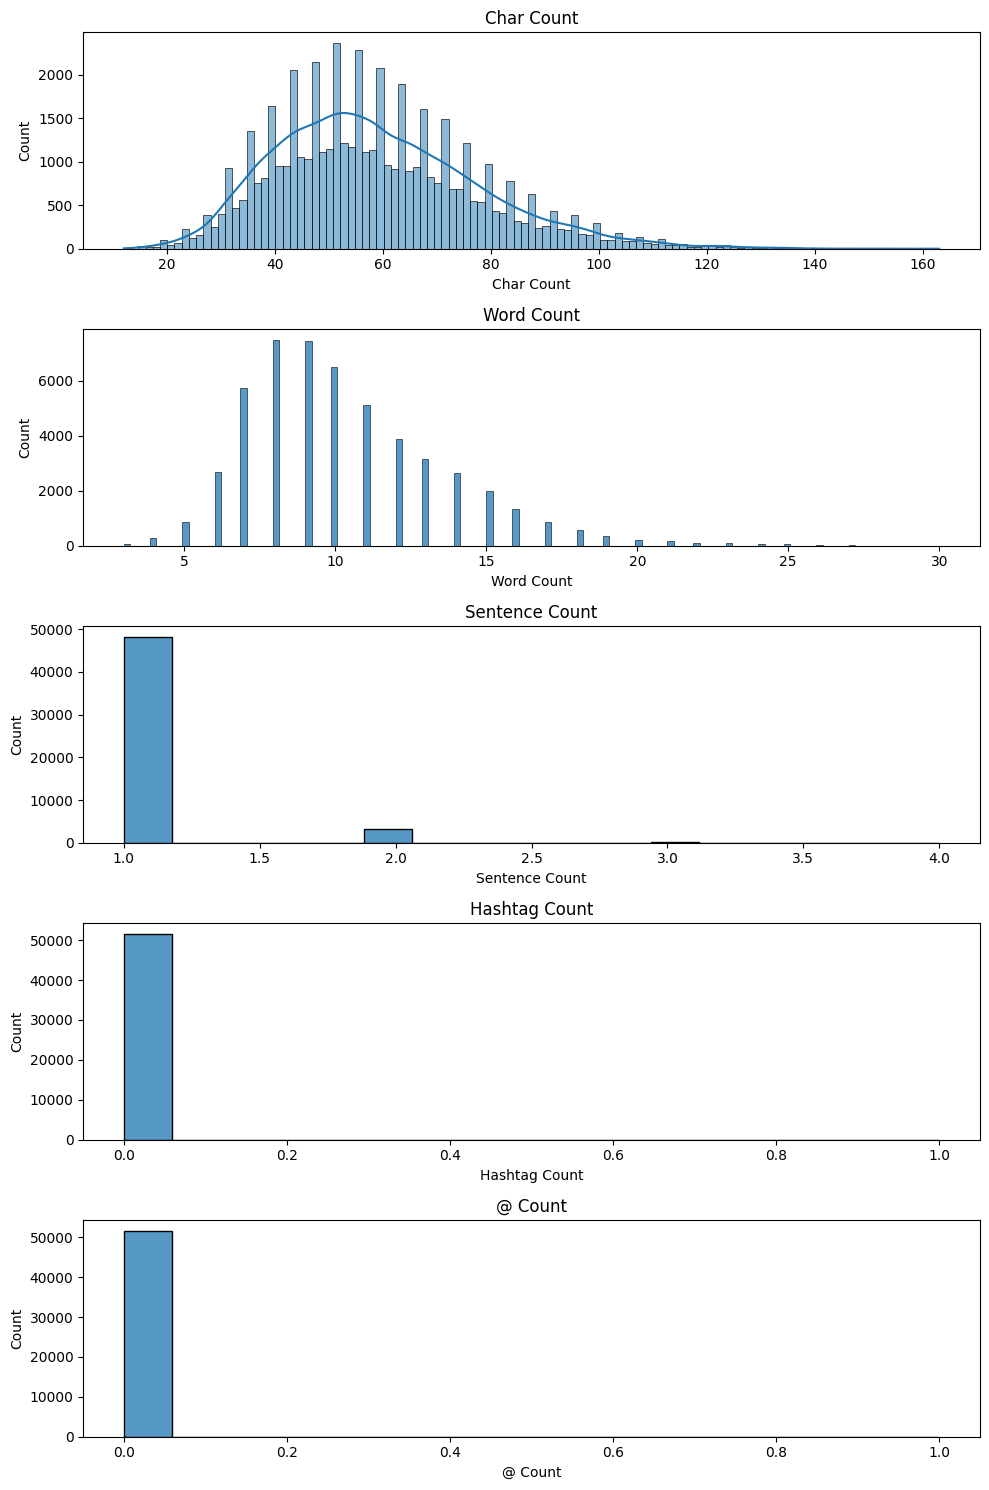

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con 5 subgráficos
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Definir las columnas a graficar
columnas = ['Char Count', 'Word Count', 'Sentence Count', 'Hashtag Count', '@ Count']

# Crear gráficos KDE para cada columna y asignarlos a los subgráficos
for i, columna in enumerate(columnas):
    aux = i==0
    sns.histplot(data=products_name_df, x=columna, ax=axes[i], kde=aux)
    axes[i].set_title(columna)

# Ajustar los espacios entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Normalización

In [66]:
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,Duracell - AAA Batteries (4-Pack),33,5,1,0,0
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),47,7,1,0,0
2,127687,Duracell - AA Batteries (8-Pack),32,5,1,0,0
3,150115,Energizer - MAX Batteries AA (4-Pack),37,6,1,0,0
4,185230,Duracell - C Batteries (4-Pack),31,5,1,0,0


In [73]:
products_name_df['Name'] = text_normalizer.normalize_corpus(products_name_df['Name'], stopwords=stop_words, text_lemmatization=True)
products_name_df.head()

"products_name_df['Name'] = text_normalizer.normalize_corpus(products_name_df['Name'], stopwords=stop_words, text_lemmatization=True)\nproducts_name_df.head()"

In [ ]:
# Guardamos para no tener que pasar por lo mismo
products_name_df.to_csv('dataset/prod_names_normalized.csv',index=False)

In [67]:
# leemos para no tener que pasar por lo mismo.
products_name_df = pd.read_csv('dataset/prod_names_normalized.csv')
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,duracell aaa batteries pack,33,5,1,0,0
1,48530,duracell aa v coppertop batteries pack,47,7,1,0,0
2,127687,duracell aa batteries pack,32,5,1,0,0
3,150115,energizer max batteries aa pack,37,6,1,0,0
4,185230,duracell c batteries pack,31,5,1,0,0


## Conteo de palabras más frecuentes y palabras menos frecuentes.
* Creación de un corpus unidimensional a fin de realizar los conteos.

In [68]:
corpus_names = [word for i in products_name_df['Name'].str.split().values.tolist() for word in i if (word not in stop_words)]

In [69]:
corpus_names[0:10]

['duracell',
 'aaa',
 'batteries',
 'pack',
 'duracell',
 'aa',
 'v',
 'coppertop',
 'batteries',
 'pack']

In [70]:
len(corpus_names)

394891

In [71]:
len(set(corpus_names))

14182

### Análisis de palabras más frecuentes

In [72]:
from nltk.probability import FreqDist
most_common_names = FreqDist(corpus_names).most_common(n=None)
most_common_names_df = pd.DataFrame(most_common_names, columns=['Word', 'Count'])
most_common_names_df.head()

,Word,Count
0,black,18805
1,white,5946
2,case,4991
3,apple,4617
4,pre,3636


In [73]:
# Decidimos cuantas palabras deseamos plotear.
from nltk.probability import FreqDist
common_num = 60
most_common_plot = most_common_names_df[0:common_num+1].copy()
most_common_plot.head()

,Word,Count
0,black,18805
1,white,5946
2,case,4991
3,apple,4617
4,pre,3636


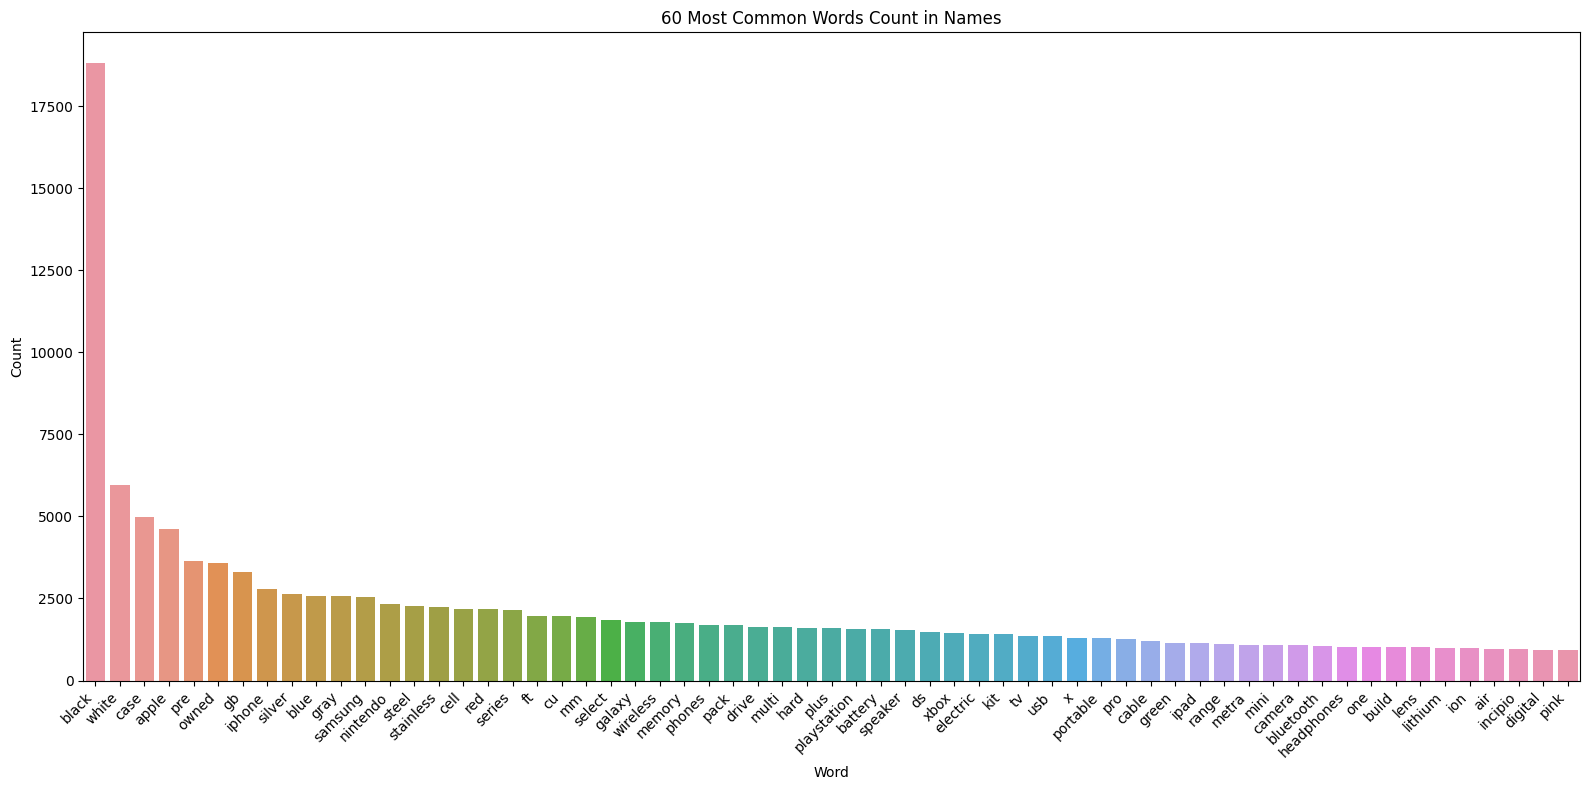

In [74]:
plt.figure(figsize=(16,8))
Title = f'{common_num} Most Common Words Count in Names'
sns.barplot(data=most_common_plot, x='Word', y='Count')
plt.title(Title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Análisis de palabras menos frecuentes

In [75]:
least_common_names_df = most_common_names_df.sort_values('Count', ascending=True)
least_common_names_df.reset_index(inplace=True)
least_common_names_df.drop('index', axis=1, inplace=True)
least_common_names_df.head()

,Word,Count
0,wicking,1
1,clamps,1
2,stance,1
3,langdon,1
4,hills,1


In [76]:
len(least_common_names_df[least_common_names_df['Count']==1])
# Existen 4641 palabras que solo se repiten una sola vez en todas las descripciones juntas.

4641

## Conteo de ngramas más frecuentes y menos frecuentes
* Ordenar products_df según número de palabras (Words Count)
* Determinar cantidad de números de palabras a agrupar.
* Dividir el dataframe no en partes iguales por líneas, sino en partes iguales según acumulación de palabras.
* Implementar el análisis de bigramas en cada parte.
* Implementar el análisis de trigramas en cada parte.

### Ordenar products_descri_df según número de palabras (Words Count)

In [77]:
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,43900,duracell aaa batteries pack,33,5,1,0,0
1,48530,duracell aa v coppertop batteries pack,47,7,1,0,0
2,127687,duracell aa batteries pack,32,5,1,0,0
3,150115,energizer max batteries aa pack,37,6,1,0,0
4,185230,duracell c batteries pack,31,5,1,0,0


In [78]:
products_name_df.sort_values('Word Count', inplace=True, ascending=False)
products_name_df.reset_index(inplace=True, drop=True)
products_name_df.head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,4969300,msi gs ghost pro k k ultra hd laptop intel cor...,142,30,1,0,0
1,4924100,lg class diag lead p smart k ultra hd tv high ...,116,28,2,0,0
2,4968032,msi gts titan sli laptop intel core gb memory ...,133,28,1,0,0
3,7723029,epson professional enhanced matte inkjet paper...,163,28,1,0,0
4,4754317,cybertronpc vapor sk x k ultra hd laptop intel...,134,28,1,0,0


### Determinar cantidad de números de palabras a agrupar.

In [79]:
tot_palabras = products_name_df['Word Count'].sum()
tot_palabras

533345

In [80]:
target_palabras = tot_palabras//8
target_palabras

66668

### Dividir el dataframe no en partes iguales por líneas, sino en partes iguales según acumulación de palabras.

In [81]:
dataframe_list = []

current_sum = 0
current_dataframe = pd.DataFrame(columns=products_name_df.columns)

for index, row in products_name_df.iterrows():
    current_sum += row['Word Count']
    current_dataframe = pd.concat([current_dataframe, pd.DataFrame(row).transpose()])

    if current_sum >= target_palabras:
        dataframe_list.append(current_dataframe)
        current_dataframe = pd.DataFrame(columns=products_name_df.columns)
        current_sum = 0

if len(current_dataframe) > 0:
    dataframe_list.append(current_dataframe)

In [82]:
dataframe_list[0].head()

,Skus,Name,Char Count,Word Count,Sentence Count,Hashtag Count,@ Count
0,4969300,msi gs ghost pro k k ultra hd laptop intel cor...,142,30,1,0,0
1,4924100,lg class diag lead p smart k ultra hd tv high ...,116,28,2,0,0
2,4968032,msi gts titan sli laptop intel core gb memory ...,133,28,1,0,0
3,7723029,epson professional enhanced matte inkjet paper...,163,28,1,0,0
4,4754317,cybertronpc vapor sk x k ultra hd laptop intel...,134,28,1,0,0


### Implementar el análisis de bigramas en cada parte.

In [83]:
bigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    bigram_aux = get_ngram_freq(2, dafra, 'Name')
    bigram_dataframe = pd.concat([bigram_dataframe, bigram_aux[0:1000]], axis=0)

bigram_dataframe.head()

,frequency,ngram
9,945,gb memory
12,694,hard drive
7,612,intel core
110,592,apple iphone
315,558,case apple


In [84]:
len(bigram_dataframe)

8000

In [85]:
bigram_dataframe_grouped = bigram_dataframe.groupby('ngram').sum()
bigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
bigram_dataframe_grouped.reset_index(inplace=True)
bigram_dataframe_grouped.head()

,ngram,frequency
0,pre owned,3589
1,apple iphone,2589
2,case apple,2551
3,stainless steel,2127
4,cu ft,1943


In [86]:
len(bigram_dataframe_grouped)

4291

In [87]:
bigram_dataframe_grouped.tail()

,ngram,frequency
4286,weather adirondack,5
4287,gaelan umbrella,5
4288,blender blue,5
4289,cokin pro,5
4290,squad smart,5


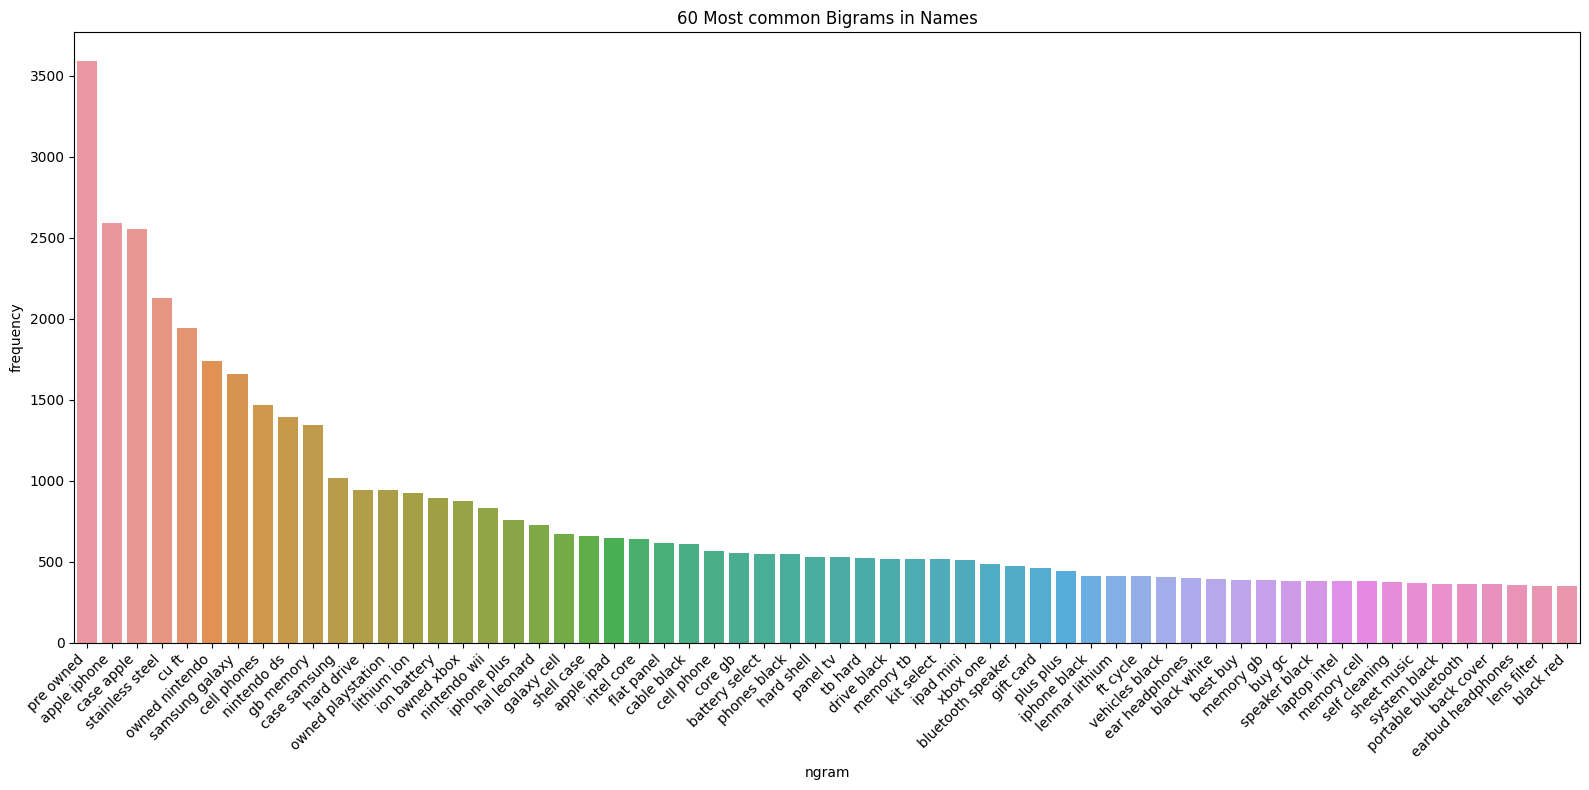

In [88]:
val_max = 60
ngram_grouped_plot = bigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Bigrams in Names'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Implementar el análisis de trigramas en cada parte.

In [89]:
trigram_dataframe = pd.DataFrame(columns=["frequency", "ngram"])

for dafra in dataframe_list:
    trigram_data_aux = get_ngram_freq(3, dafra, 'Name')
    trigram_dataframe = pd.concat([trigram_dataframe, trigram_data_aux[0:1000]], axis=0)

trigram_dataframe.head()

,frequency,ngram
7,546,intel core gb
8,517,core gb memory
9,499,gb memory tb
11,467,tb hard drive
10,439,memory tb hard


In [90]:
len(trigram_dataframe)

8000

In [91]:
trigram_dataframe_grouped = trigram_dataframe.groupby('ngram').sum()
trigram_dataframe_grouped.sort_values('frequency', ascending=False, inplace=True)
trigram_dataframe_grouped.reset_index(inplace=True)
trigram_dataframe_grouped.head()

,ngram,frequency
0,case apple iphone,2021
1,pre owned nintendo,1741
2,owned nintendo ds,1098
3,case samsung galaxy,1017
4,pre owned playstation,940


In [92]:
len(trigram_dataframe_grouped)

5423

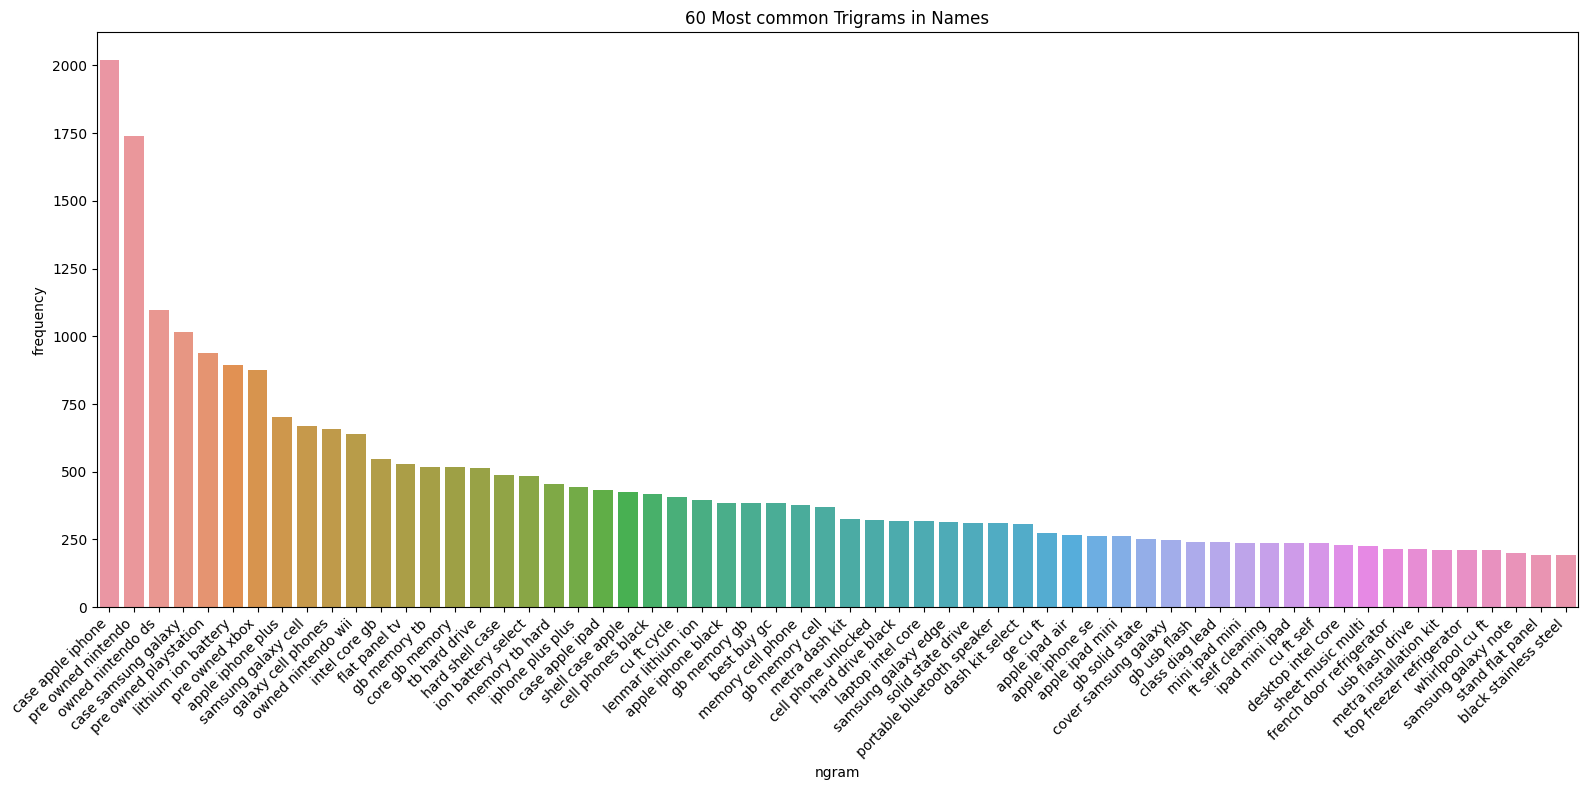

In [93]:
val_max = 60
ngram_grouped_plot = trigram_dataframe_grouped[0:val_max].copy()
title = f'{val_max} Most common Trigrams in Names'
plt.figure(figsize=(16, 8))
sns.barplot(data=ngram_grouped_plot, x='ngram', y='frequency')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conteo de palabras de una sola letra

In [94]:
most_common_names_df.head()

,Word,Count
0,black,18805
1,white,5946
2,case,4991
3,apple,4617
4,pre,3636


In [95]:
most_common_single_letter = [[word, count] for word, count in zip(most_common_names_df['Word'], most_common_names_df['Count']) if len(word) == 1]
most_common_single_letter = pd.DataFrame(most_common_single_letter, columns=['Word', 'Count'])
most_common_single_letter.head()

,Word,Count
0,x,1307
1,g,850
2,w,767
3,k,558
4,v,526


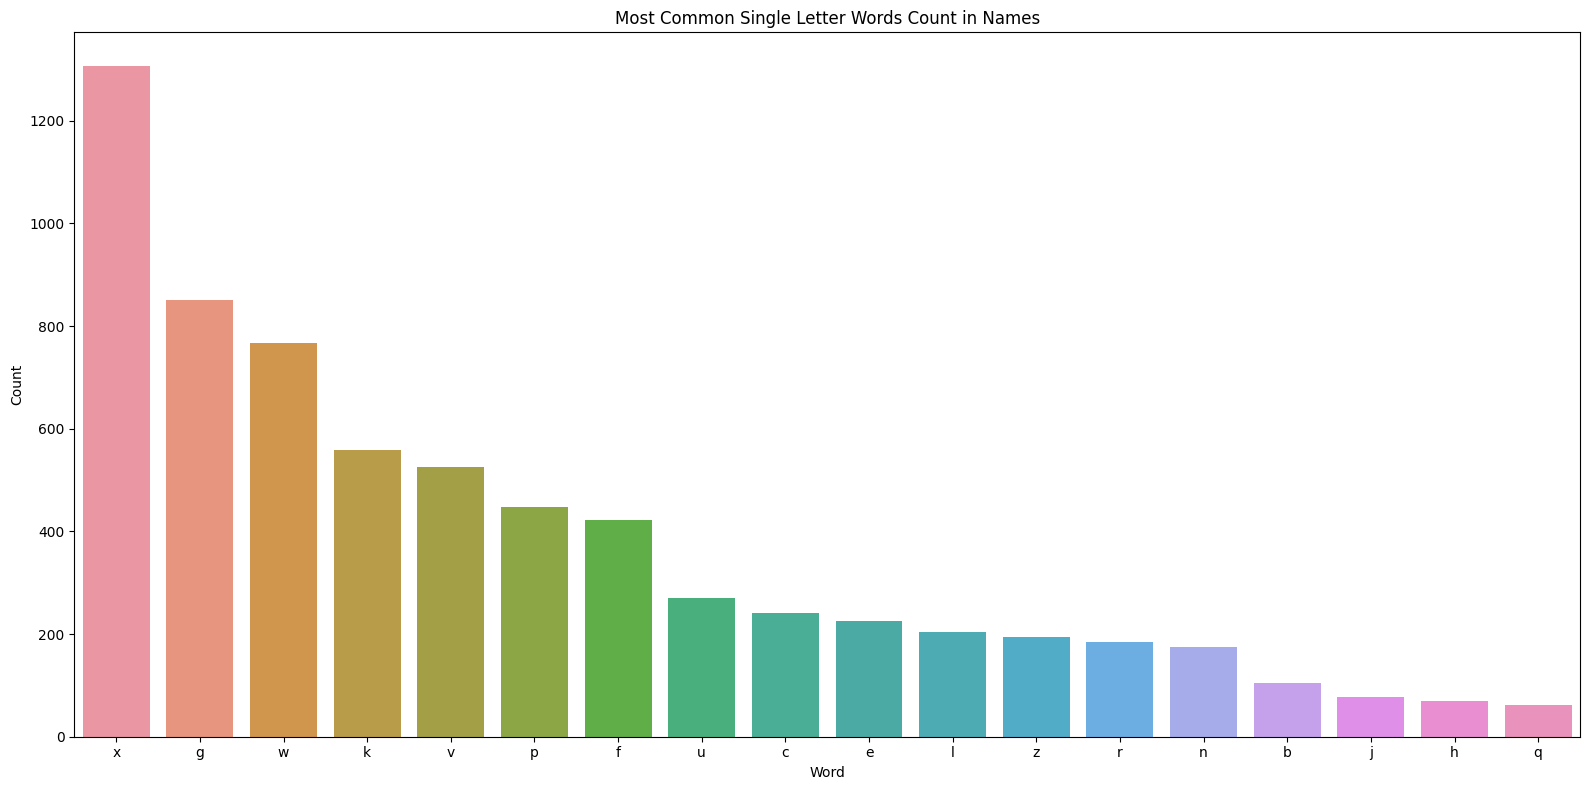

In [96]:
plt.figure(figsize=(16,8))
Title = 'Most Common Single Letter Words Count in Names'
sns.barplot(data=most_common_single_letter, x='Word', y='Count')
plt.title(Title)
plt.tight_layout()
plt.show()

# Análisis de Categorías
* Verificar las categorías del dataset categories.
* Verificar también las categorías del dataset products.
* Analizar cuales categorías son más frecuentes.
* Analizar cuales categorías son menos frecuentes.

In [97]:
products_categories_df.head()

,Skus,Category
0,43900,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
1,48530,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
2,127687,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
3,150115,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
4,185230,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."


In [98]:
categorias_list = [cat for element in products_categories_df['Category'] for cat in element]
categorias_list[0:3]

[{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'},
 {'id': 'pcmcat248700050021', 'name': 'Housewares'},
 {'id': 'pcmcat303600050001', 'name': 'Household Batteries'}]

In [99]:
categorias_list = []
categorias_list = [cat.values() for element in products_categories_df['Category'] for cat in element]
categorias_list[0:3]

[dict_values(['pcmcat312300050015', 'Connected Home & Housewares']),
 dict_values(['pcmcat248700050021', 'Housewares']),
 dict_values(['pcmcat303600050001', 'Household Batteries'])]

In [100]:
categorias_df = pd.DataFrame(categorias_list, columns=['ID', 'Name'])
categorias_df.head()

,ID,Name
0,pcmcat312300050015,Connected Home & Housewares
1,pcmcat248700050021,Housewares
2,pcmcat303600050001,Household Batteries
3,abcat0208002,Alkaline Batteries
4,pcmcat312300050015,Connected Home & Housewares


In [101]:
categorias_set_df = categorias_df.drop_duplicates()
categorias_set_df.reset_index(drop=True)
print((len(set(categorias_set_df['ID'])), len(set(categorias_set_df['Name']))))
# Esto nos dice que hay varios casos en los que el nombre es el mismo pero tienen IDs distintos. 
# Se han creado IDs distintos cuando pudieron haberlo puesto bajo el mismo ID. Debemos detectar estos casos. Probablemente fueron errores humanos.

(1857, 1802)


In [102]:
duplicados = categorias_set_df[categorias_set_df.duplicated('Name', keep=False)]
duplicados

,ID,Name
165,pcmcat151600050037,Keyboards
170,pcmcat152100050038,Microphones
400,abcat0204000,Headphones
450,abcat0507009,Power Supplies
473,pcmcat378800050014,Accessories
...,...,...
160220,pcmcat147400050001,Card & Puzzle
160957,pcmcat147400050009,Sports & Outdoors
161387,pcmcat152100050036,Headphones
170177,abcat0107033,Subwoofer Cables


In [103]:
same_name_IDs = duplicados.groupby('Name')['ID'].unique().reset_index()
same_name_IDs

,Name,ID
0,Accessories,"[pcmcat378800050014, pcmcat96200050046, pcmcat..."
1,Action & Adventure,"[pcmcat147400050000, abcat0701003, abcat070700..."
2,Aluminum Tripods,"[pcmcat240400050039, pcmcat241300050041]"
3,Apple Watch,"[pcmcat748300489081, pcmcat748300489175]"
4,Bluetooth & Wireless Speakers,"[pcmcat310200050004, abcat0205009]"
5,Brother,"[pcmcat152600050013, abcat0807002, abcat0807010]"
6,Cables & Connectors,"[pcmcat165900050026, abcat0515012]"
7,Canon,"[abcat0807003, pcmcat140900050016, pcmcat15510..."
8,Card & Puzzle,"[pcmcat147000050063, pcmcat147400050001]"
9,Coffee Makers,"[abcat0912005, abcat0912009]"


In [104]:
same_IDs_name = duplicados.groupby('ID')['Name'].unique().reset_index()
same_IDs_name

,ID,Name
0,abcat0102008,[Portable DVD Players]
1,abcat0106001,[TV Stands]
2,abcat0106012,[Small]
3,abcat0106013,[Medium]
4,abcat0106014,[Large]
...,...,...
107,pcmcat385200050003,[Disney Infinity]
108,pcmcat748300489081,[Apple Watch]
109,pcmcat748300489175,[Apple Watch]
110,pcmcat748301666245,[Portable Speakers]


In [105]:
li = []
bandera = True
for elemento in same_IDs_name['Name']:
    cont = 0
    for cat in elemento:
        cont+= 1
        if cont > 1:
            bandera=False
        li.append(cat)

if bandera == True:
    var = 'VERDADERO'
else:
    var = 'FALSO'
print(f'Es {var} que ningún ID apunta a más de una categoría')

Es VERDADERO que ningún ID apunta a más de una categoría


In [106]:
same_name_IDs.to_csv('dataset/same_name_dif_IDs.csv', index=False)

## Conteo de categorías

In [183]:
categorias_df_conteo = categorias_df.groupby('Name').count()
categorias_df_conteo.reset_index(inplace=True)
categorias_df_conteo.columns=['Name', 'Count']
categorias_df_conteo.sort_values('Count', ascending=False, inplace=True)
categorias_df_conteo.reset_index(inplace=True, drop=True)
categorias_df_conteo

,Name,Count
0,Appliances,9317
1,Cell Phones,6905
2,Cell Phone Accessories,6176
3,Computers & Tablets,6088
4,Video Games,5837
...,...,...
1797,Installation & Conversion Kits,1
1798,Ink,1
1799,Incandescent Light Bulbs,1
1800,Image Softening Filters,1


In [184]:
len(categorias_df)

179690

In [185]:
categorias_df_conteo['Name'] = text_normalizer.normalize_corpus(categorias_df_conteo['Name'], stopwords=stop_words, text_lemmatization=True)
categorias_df_conteo.head()

c:\Users\pct3x\OneDrive\Documentos\AnyoneAI\Final Project\e_commerce_categorization\src\text_normalizer.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  texto = BeautifulSoup(text, 'html.parser')


,Name,Count
0,appliance,9317
1,cell phone,6905
2,cell phone accessory,6176
3,computer tablets,6088
4,video games,5837


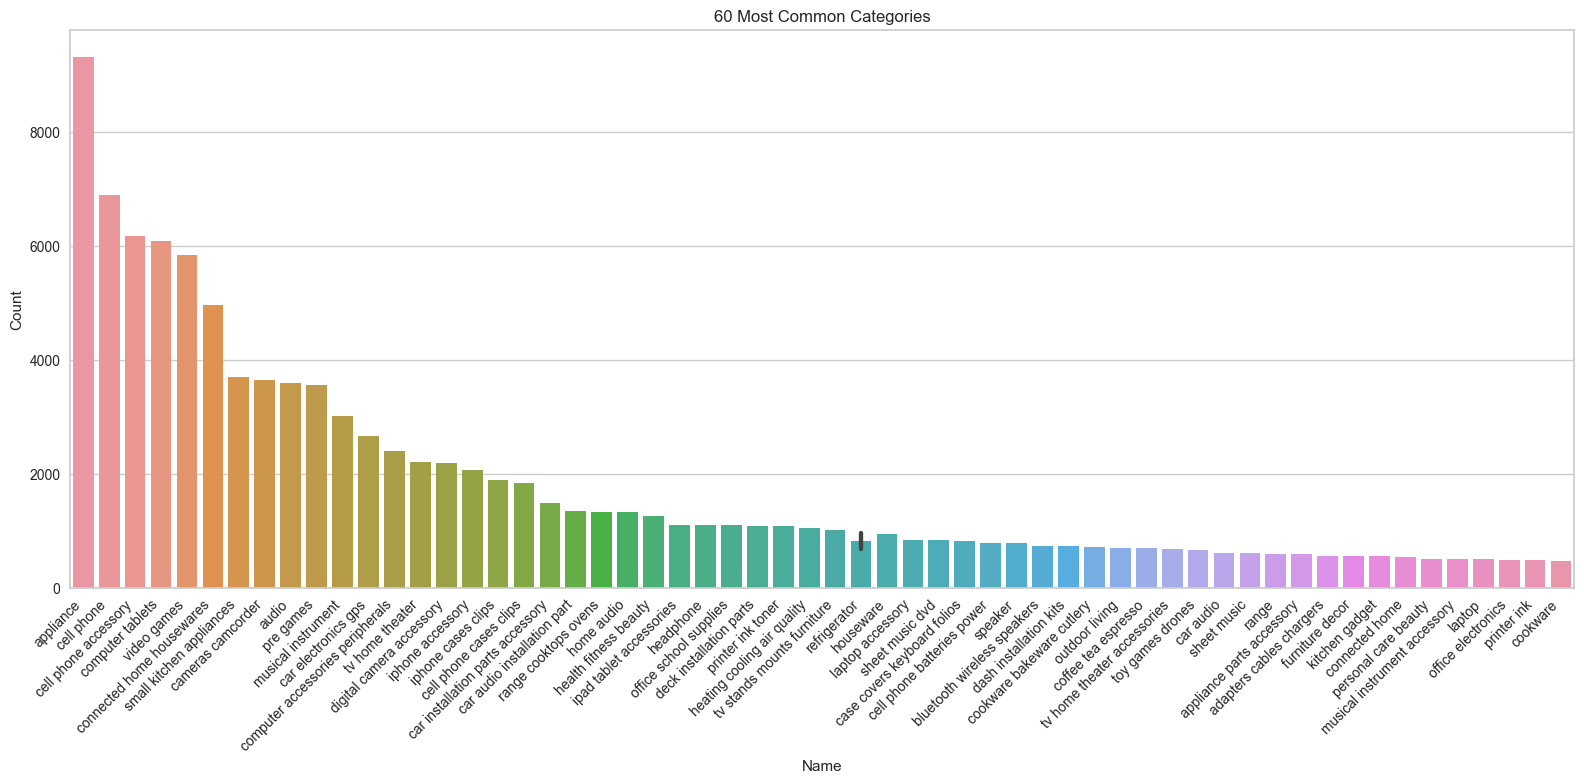

In [186]:
cant_var = 60
categorias_df_plot = categorias_df_conteo[0:cant_var].copy()
title=f'{cant_var} Most Common Categories'
plt.figure(figsize=(16,8))
sns.barplot(data=categorias_df_plot, x='Name', y='Count')
plt.title(title)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [187]:
categorias_df_conteo.sort_values('Count', ascending=True, inplace=True)
categorias_df_conteo

,Name,Count
1801,light dimmers control,1
1645,carbon fiber tripod,1
1644,casino,1
1643,cassette adapters,1
1642,cell phone docks,1
...,...,...
4,video games,5837
3,computer tablets,6088
2,cell phone accessory,6176
1,cell phone,6905


In [188]:
len(categorias_df_conteo[categorias_df_conteo['Count']<=100])
# Existen 1534 categorías que han sido utilizadas menos de 100 veces.

1534

In [189]:
len(categorias_df_conteo[categorias_df_conteo['Count']<=1000])
# Existen 1772 categorías que han sido utilizadas menos de 1000 veces.

1772

### Agrupamos todas las categorías que tienen menos de 100 apariciones en una sola categoría llamada "others"

In [190]:
cat_others_count = categorias_df_conteo[categorias_df_conteo['Count'] <= 100].copy()
cat_others_count.reset_index(inplace=True, drop=True)
cat_others_count


,Name,Count
0,light dimmers control,1
1,carbon fiber tripod,1
2,casino,1
3,cassette adapters,1
4,cell phone docks,1
...,...,...
1529,activity tracker accessories,97
1530,nintendo ds games,97
1531,handheld stick vacuums,98
1532,table portable fans,98


In [191]:
cat_others_count['Count'].sum()

29175

In [192]:
categorias_df_conteo.loc[categorias_df_conteo['Count'] <= 100, 'Name'] = 'others'
categorias_df_conteo = categorias_df_conteo.groupby(['Name']).sum()
categorias_df_conteo.sort_values('Count', ascending=False, inplace=True)
categorias_df_conteo.reset_index(inplace=True)
categorias_df_conteo

,Name,Count
0,others,29175
1,appliance,9317
2,cell phone,6905
3,cell phone accessory,6176
4,computer tablets,6088
...,...,...
250,outdoor heating,104
251,antennas adapters,103
252,mirrorless lense,102
253,monitor screen accessory,102


In [193]:
len(categorias_df_conteo[categorias_df_conteo['Count']<=1000])
# Existen 222 categorías que han sido utilizadas menos de 1000 veces.

222

## Utilizaremos clusterización para combinar las categorías con pocas frecuencias.
* Filtrar categorías con poca frecuencia.
* Vectorizar los nombres de estas categorías.
* Utilizar algún algoritmo de clusterización para ver como son combinados.

### Filtrar categorías con poca frecuencia.

In [194]:
cont_min = 1000 # Cantidad múnima de conteos que estas categorías no pueden superar de manera independiente.
categorias_pequeñas = categorias_df_conteo[categorias_df_conteo['Count'] < cont_min]
categorias_pequeñas.head()

,Name,Count
33,houseware,954
34,tv stand,886
35,laptop accessory,845
36,sheet music dvd,842
37,case covers keyboard folios,821


In [195]:
len(categorias_pequeñas)

222

### Vectorizar los nombres de estas categorías.

In [139]:
# Importamos un modelo w2v pre entrenado
import gensim.downloader
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [140]:
pretrained_w2v_model = gensim.downloader.load('glove-wiki-gigaword-300')

In [141]:
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.util import ngrams

def generate_ngrams(tokens, n):
    if n == 1:
        return tokens
    else:
        return [' '.join(ngram) for ngram in ngrams(tokens, n)]

def toktok(oraciones, ninit=1, nfin=1):
    '''
    oraciones: La lista de oraciones que se desea tokenizar.
    ninit: Cantidad de ngramas mínimo que uno desea obtener como tokens.
    nfin: Cantidad de ngramas máximo que uno desea obtener como tokens.
    '''
    tokenizer = ToktokTokenizer()

    oraciones_tokenizadas_ngramas = []
    
    for oracion in oraciones:
        ngram_tokens = [generate_ngrams(tokenizer.tokenize(oracion), n) for n in range(ninit, nfin+1)]
        ngram_tokens_flattened = [token for ngram in ngram_tokens for token in ngram]
        oraciones_tokenizadas_ngramas.append(ngram_tokens_flattened)
        

    return oraciones_tokenizadas_ngramas

In [196]:
cat_peq_tokenized = toktok(categorias_pequeñas['Name'], 1, 1)
cat_peq_tokenized[0:8]

[['houseware'],
 ['tv', 'stand'],
 ['laptop', 'accessory'],
 ['sheet', 'music', 'dvd'],
 ['case', 'covers', 'keyboard', 'folios'],
 ['cell', 'phone', 'batteries', 'power'],
 ['speaker'],
 ['bluetooth', 'wireless', 'speakers']]

In [197]:
def vectorizer_pretrained(corpus, model, num_features: int=100):
    corpus_size = len(corpus)
    corpus_vectors = np.zeros((corpus_size, num_features), dtype=np.float32)

    for i, document in enumerate(corpus):
        word_count = 0
        doc_vector = np.zeros(num_features, dtype=np.float32)

        for word in document:
            if word in model:
                doc_vector += model.word_vec(word)
                word_count+=1
        
        if word_count > 0:
            doc_vector /= word_count
        
        corpus_vectors[i] = doc_vector
    
    return corpus_vectors

In [198]:
cat_peq_vectorized = vectorizer_pretrained(cat_peq_tokenized, pretrained_w2v_model, 300)
cat_peq_vectorized[0:8]

C:\Users\pct3x\AppData\Local\Temp\ipykernel_4804\4183870425.py:11: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vector += model.word_vec(word)


array([[ 0.68769   , -0.22314   , -0.15545   , ..., -0.12149   ,
         0.72531   ,  0.075321  ],
       [ 0.090469  ,  0.35853   , -0.006915  , ...,  0.12438499,
        -0.049498  ,  0.18533501],
       [-0.217705  ,  0.35582948, -0.32893002, ...,  0.548065  ,
         0.16656   , -0.233375  ],
       ...,
       [-0.21081498,  0.016378  , -0.23963498, ..., -0.25109175,
        -0.165465  ,  0.08973365],
       [-0.094479  , -0.31517   ,  0.21301   , ..., -0.14889   ,
        -0.23396   ,  0.47062   ],
       [-0.41698733, -0.17429368,  0.02408666, ...,  0.36750665,
         0.14653666, -0.21439   ]], dtype=float32)

In [145]:
len(cat_peq_vectorized)

222

### Utilizar KMeans como algoritmo de clusterización para ver como son combinados.

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


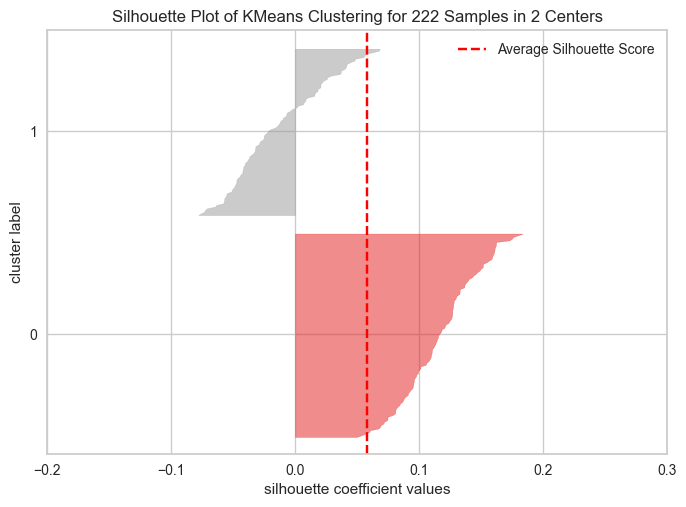

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


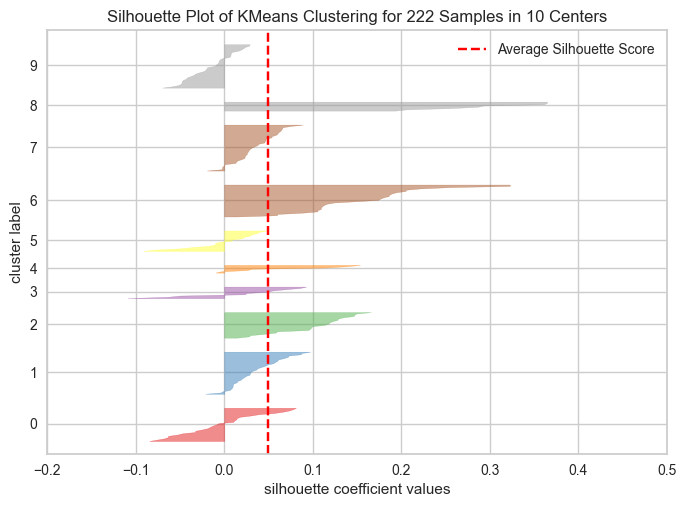

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


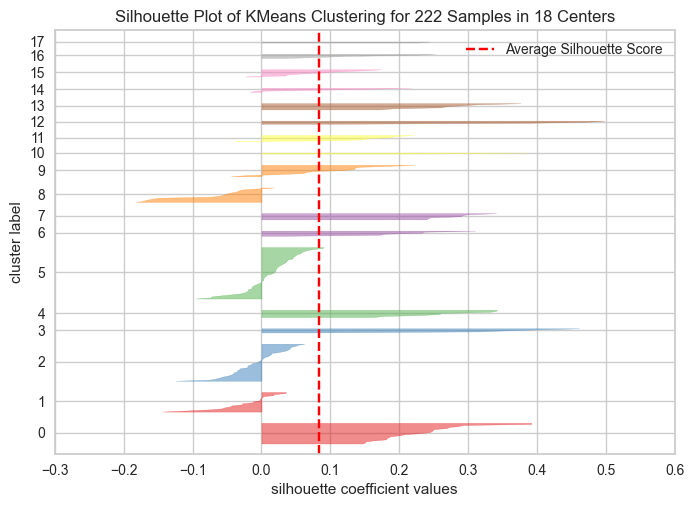

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


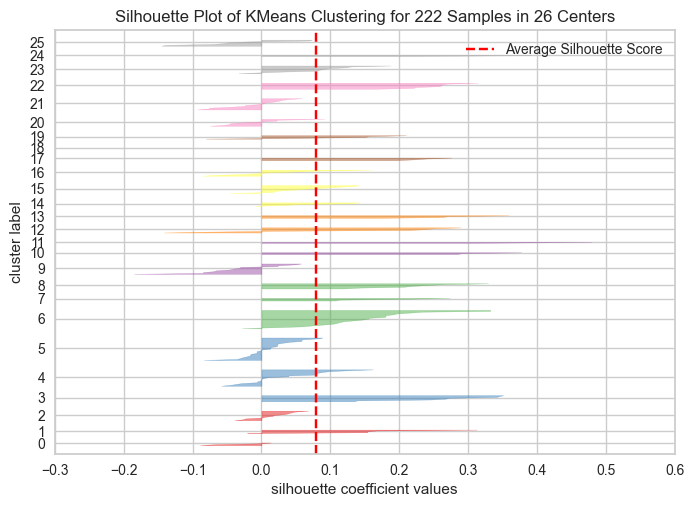

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


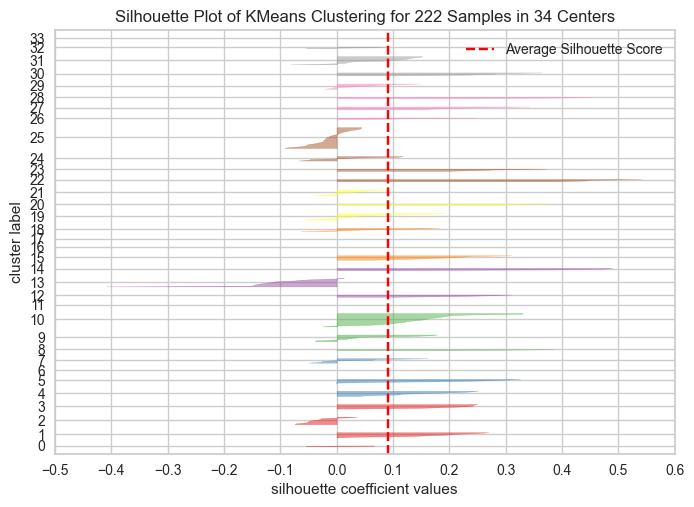

c:\Users\pct3x\ambientes\FinalProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


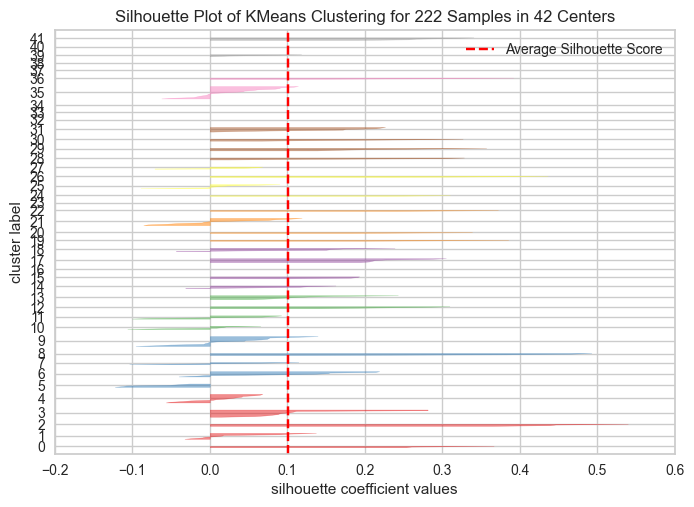

In [146]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2, 50, 8):

    # Inicializar el modelo KMeans y el visualizador
    km = KMeans(n_clusters=i)
    visualizer = SilhouetteVisualizer(km)

    # Ajustar el visualizador con los datos
    visualizer.fit(cat_peq_vectorized)

    # Mostrar el gráfico
    visualizer.show()

Claramente, si el Silhouette Score no mejora ya con 50 clusters, este no es el camino.

## Entrenaremos nuestro Word2Vec considerando que cada producto tiene varias categorías y por ende tienen cierta relación o cercanía.
Consideraremos por cada producto, que su lista de categorías es una oración y que cada categoría es una palabra y armaremos un modelo de sugerencia de palabras más cercanas, es decir, categorías que son más cercanas.
* Sacar un dataframe con columas Skus y Category con la lista de categorías de cada sku.
* Normalizar cada categoría.
* Entrenar el modelo Word2Vec.
* Verificar recomendaciones.

### Sacar un dataframe con columnas Skus y Category con la lista de categorías de cada sku.

In [199]:
products_categories_df.head()

,Skus,Category
0,43900,"[connected home housewares, houseware, househo..."
1,48530,"[connected home housewares, houseware, househo..."
2,127687,"[connected home housewares, houseware, househo..."
3,150115,"[connected home housewares, houseware, househo..."
4,185230,"[connected home housewares, houseware, househo..."


In [200]:
products_descri_df = products_df.drop(['Name', 'Category'], axis=1)
products_name_df = products_df.drop(['Descriptions', 'Category'], axis=1)
products_categories_df = products_df.drop(['Name', 'Descriptions'], axis=1)

In [201]:
len(products_categories_df)

51645

In [202]:
products_categories_df.head()

,Skus,Category
0,43900,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
1,48530,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
2,127687,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
3,150115,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."
4,185230,"[{'id': 'pcmcat312300050015', 'name': 'Connect..."


In [203]:
lista_cat = []
lista_cat2 = []
for diccionarios in products_categories_df['Category']:
    lista_cat = [dic['name'] for dic in diccionarios]
    lista_cat2.append(lista_cat)

In [204]:
lista_cat2[0:3]

[['Connected Home & Housewares',
  'Housewares',
  'Household Batteries',
  'Alkaline Batteries'],
 ['Connected Home & Housewares',
  'Housewares',
  'Household Batteries',
  'Alkaline Batteries'],
 ['Connected Home & Housewares',
  'Housewares',
  'Household Batteries',
  'Alkaline Batteries']]

In [205]:
products_categories_df['Category'] = lista_cat2
products_categories_df.head()

,Skus,Category
0,43900,"[Connected Home & Housewares, Housewares, Hous..."
1,48530,"[Connected Home & Housewares, Housewares, Hous..."
2,127687,"[Connected Home & Housewares, Housewares, Hous..."
3,150115,"[Connected Home & Housewares, Housewares, Hous..."
4,185230,"[Connected Home & Housewares, Housewares, Hous..."


### Normalizar cada categoría.

In [206]:
def normalizador(lista):
    normalizado = text_normalizer.normalize_corpus(lista, stopwords=stop_words, text_lemmatization=True)
    return normalizado

In [ ]:
products_categories_df['Category'] = products_categories_df['Category'].apply(normalizador)
products_categories_df.head()

In [ ]:
products_categories_df.to_csv('dataset/categories_normalized.csv', index=False)

In [207]:
import ast
products_categories_df = pd.read_csv('dataset/categories_normalized.csv')
products_categories_df['Category'] = products_categories_df['Category'].apply(ast.literal_eval)
products_categories_df.head()

,Skus,Category
0,43900,"[connected home housewares, houseware, househo..."
1,48530,"[connected home housewares, houseware, househo..."
2,127687,"[connected home housewares, houseware, househo..."
3,150115,"[connected home housewares, houseware, househo..."
4,185230,"[connected home housewares, houseware, househo..."


In [208]:
categorias_df_conteo.sort_index(inplace=True)
categorias_df_conteo.head()

,Name,Count
0,others,29175
1,appliance,9317
2,cell phone,6905
3,cell phone accessory,6176
4,computer tablets,6088


### Entrenar el modelo Word2Vec.

In [177]:
from gensim.models import Word2Vec

In [209]:
products_categories_df.head()

,Skus,Category
0,43900,"[connected home housewares, houseware, househo..."
1,48530,"[connected home housewares, houseware, househo..."
2,127687,"[connected home housewares, houseware, househo..."
3,150115,"[connected home housewares, houseware, househo..."
4,185230,"[connected home housewares, houseware, househo..."


In [210]:
cat_others_count.head()

,Name,Count
0,light dimmers control,1
1,carbon fiber tripod,1
2,casino,1
3,cassette adapters,1
4,cell phone docks,1


In [227]:
categorias_others = [[aux if aux not in cat_others_count['Name'].values else 'others' for aux in lista] for lista in products_categories_df['Category']]
categorias_others[0:10]

[['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['others'],
 ['connected home housewares', 'houseware', 'household battery', 'others'],
 ['car electronics gps',
  'car installation parts accessory',
  'car audio installation part',
  'deck installation parts',
  'dash installation kits']]

In [232]:
products_categories_df['Category'][0:10].values

array([list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['connected home housewares', 'houseware', 'household battery', 'alkaline battery']),
       list(['carfi instore']),
       list(['connected home housewares', 'houseware', 'household battery', 'specialty battery']),
       list(['car electronics gps', 'car installation parts accessory', 'car audio installation part', 'deck installation parts', 'dash installation kits'])],
      dtype=object)

In [235]:
len(categorias_others)

51645

In [133]:
model = Word2Vec(categorias_others, vector_size=32, window=50, min_count=1, workers=4, epochs=100000)

### Verificar recomendaciones

In [183]:
cat_query = 'alkaline battery'
most_similar = model.wv.most_similar(positive=cat_query)
most_similar_df = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar_df

,Category,Score
0,rechargeable battery,0.999801
1,specialty battery,0.998831
2,lithium battery,0.986356
3,carfi instore,0.561844
4,color laser printers,0.554617
5,black white laser printers,0.553799
6,one laser printers,0.544587
7,connected home,0.473576
8,video game accessory,0.433071
9,gps navigation accessory,0.429594


In [188]:
elemento_buscado = cat_query
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)


[['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 'alkaline battery'], ['connected home housewares', 'houseware', 'household battery', 

In [189]:
elemento_buscado = 'rechargeable battery'
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home housewares', 'houseware', 'household battery', 'rechargeable battery'], ['connected home hou

Hemos verificado que 'alkaline battery' y 'rechargeable battery' aparecen siempre rodeados de las mismas categorías.

In [190]:
cat_query = 'pen pencils markers'
most_similar = model.wv.most_similar(positive= cat_query)
most_similar_df = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar_df

,Category,Score
0,whiteboards presentation supplies,0.870110
1,arts crafts,0.865684
2,binders folders filing,0.864064
3,organizers storage,0.861708
4,desk supplies fasteners,0.856308
5,epson,0.588399
6,printer filament,0.587462
7,crash cymbal,0.584621
8,hi hat cymbal,0.578674
9,china cymbal,0.574513


In [191]:
elemento_buscado = cat_query
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['connected home housewares', 'office school supplies', 'pen pencils markers', 'pen'], ['connected home housewares', 'office school supplies', 'pen pencils markers', 'marker'], ['connected home housewares', 'office school supplies', 'pen pencils markers', 'pen'], ['connected home housewares', 'office school supplies', 'pen pencils markers', 'pen'], ['connected home housewares', 'office school supplies', 'pen pencils markers', 'pencil'], ['connected home housewares', 'office school supplies', 'pen pencils markers', 'pen'], ['connected home housewares', 'office school supplies', 'pen pencils markers', 'pen'], ['connected home housewares', 'office school supplies', 'pen pencils markers', 'pen'], ['connected home housewares', 'office school supplies', 'pen pencils markers', 'pen']]


In [192]:
elemento_buscado = 'whiteboards presentation supplies'
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['connected home housewares', 'office school supplies', 'whiteboards presentation supplies'], ['connected home housewares', 'office school supplies', 'whiteboards presentation supplies']]


También ocurre lo mismo entre 'pen pencils markers' y 'whiteboards presentation supplies'. Ambos estan generalmente rodeados de las mismas categorías.

El modelo hasta ahora tiene excelentes recomendaciones. Ahora probemos con categorías con pocas apariciones.

### Verificar recomendaciones de una categoría con pocas apariciones.

In [137]:
ruta_modelo = 'modelos/modelo_w2v.model'
model.save(ruta_modelo)

In [138]:
model_loaded = Word2Vec.load(ruta_modelo)
model_loaded.wv.key_to_index

{'appliance': 0,
 'cell phone': 1,
 'cell phone accessory': 2,
 'computer tablets': 3,
 'video games': 4,
 'connected home housewares': 5,
 'small kitchen appliances': 6,
 'cameras camcorder': 7,
 'audio': 8,
 'pre games': 9,
 'musical instrument': 10,
 'car electronics gps': 11,
 'computer accessories peripherals': 12,
 'tv home theater': 13,
 'digital camera accessory': 14,
 'iphone accessory': 15,
 'iphone cases clips': 16,
 'cell phone cases clips': 17,
 'refrigerator': 18,
 'car installation parts accessory': 19,
 'printer ink toner': 20,
 'car audio installation part': 21,
 'range cooktops ovens': 22,
 'home audio': 23,
 'health fitness beauty': 24,
 'headphone': 25,
 'ipad tablet accessories': 26,
 'office school supplies': 27,
 'deck installation parts': 28,
 'heating cooling air quality': 29,
 'tv stands mounts furniture': 30,
 'laptop': 31,
 'houseware': 32,
 'tv stand': 33,
 'laptop accessory': 34,
 'sheet music dvd': 35,
 'case covers keyboard folios': 36,
 'cell phone batt

In [161]:
cat_bajo_cont = 'light dimmers control'
most_similar = model.wv.most_similar(positive=cat_bajo_cont)
most_similar_df = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar_df

,Category,Score
0,wearable pet cameras,0.840241
1,pet feeders bowls,0.792856
2,pet supplies technology,0.732482
3,home energy technology,0.701044
4,wireless pet fence,0.680918
5,kitchen dining,0.677655
6,household battery,0.625925
7,pet grooming,0.623663
8,universal remote control,0.599509
9,remote control accessory,0.594381


In [162]:
for index, fila in products_categories_df.iterrows():
    bandera = False
    categorias_fila = []
    for cat in fila.Category:
        categorias_fila.append(cat)
        if cat == cat_bajo_cont:
            bandera=True
    if bandera:break
    
print(categorias_fila)

['connected home housewares', 'houseware', 'home energy technology', 'light dimmers control']


In [163]:
cat_bajo_cont = 'carbon fiber tripod'
most_similar = model.wv.most_similar(positive=cat_bajo_cont)
most_similar_df = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar_df

,Category,Score
0,aluminum tripod,0.997974
1,flexible tripod,0.997450
2,mini tripod,0.986753
3,tripod heads,0.982876
4,monopod,0.944688
5,camera mount,0.932517
6,tripod,0.914880
7,speakers headsets,0.479122
8,game download,0.473965
9,iphone se,0.470667


In [164]:
for index, fila in products_categories_df.iterrows():
    bandera = False
    categorias_fila = []
    for cat in fila.Category:
        categorias_fila.append(cat)
        if cat == cat_bajo_cont:
            bandera=True
    if bandera:break
    
print(categorias_fila)

['cameras camcorder', 'digital camera accessory', 'tripods monopods', 'carbon fiber tripod']


Nos damos cuenta de que el modelo tiene una idea aproximada de cuales categorías asociar, pero no lo esta haciendo tan bien con categorías con pocas apariciones.
Debemos continuar el entrenamiento sin borrar los avances anteriores, sobre solo las categorías con pocas apariciones y las categorías asociadas a ellas.

## Filtrado de categorías asociadas a categorías con pocas apariciones.

In [193]:
elemento_buscado = 'whiteboards presentation supplies'
listas_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]

print(listas_con_elemento)

[['connected home housewares', 'office school supplies', 'whiteboards presentation supplies'], ['connected home housewares', 'office school supplies', 'whiteboards presentation supplies']]


In [194]:
categorias_pequeñas.head()

,Name,Count
1801,light dimmers control,1
1645,carbon fiber tripod,1
1644,casino,1
1643,cassette adapters,1
1642,cell phone docks,1


In [195]:
len(categorias_pequeñas)

1772

In [201]:
categorias_asociadas = []
for index, fila in categorias_pequeñas.iterrows():
    elemento_buscado = fila.Name
    lista_con_elemento = [lista for lista in products_categories_df['Category'] if elemento_buscado in lista]
    for cats in lista_con_elemento:
        if cats not in categorias_asociadas:
            categorias_asociadas.append(cats)

categorias_asociadas[10:20]

[['connected home housewares',
  'furniture decor',
  'living room furniture',
  'coffee tables end tables'],
 ['computer tablets',
  'desktop one computer',
  'desktop',
  'apple imac mini mac pro',
  'imac'],
 ['car electronics gps', 'car video', 'car dvd monitor'],
 ['musical instrument',
  'recording equipment',
  'recording furniture stands',
  'benches seats'],
 ['computer tablets',
  'software',
  'antivirus security utilities',
  'utilities software',
  'backup software'],
 ['name brands', 'irobot', 'irobot hard floor cleaning robot'],
 ['computer tablets', 'laptop', 'laptop', 'ins'],
 ['car electronics gps', 'car audio', 'car speakers', 'way speakers'],
 ['connected home housewares',
  'office electronics',
  'printer ink toner',
  'printer',
  'printing accessories scanner',
  'printing accessory'],
 ['car electronics gps',
  'car audio',
  'car stereo receivers',
  'ipod ready deck']]

In [202]:
categorias_asociadas[0:10]

[['connected home housewares',
  'houseware',
  'home energy technology',
  'light dimmers control'],
 ['cameras camcorder',
  'digital camera accessory',
  'tripods monopods',
  'carbon fiber tripod'],
 ['casino'],
 ['audio',
  'ipod mp player accessory',
  'smartphone ipod car connector',
  'cassette adapters'],
 ['cell phone',
  'cell phone accessory',
  'adapters cables chargers',
  'cell phone docks'],
 ['cell phone',
  'cell phone accessory',
  'photography accessory',
  'cell phone photography kit'],
 ['health fitness beauty',
  'sports fan shop',
  'mlb merchandise',
  'chicago white sox'],
 ['movies music', 'music cd vinyl', 'children', 'childrens music'],
 ['connected home housewares',
  'houseware',
  'pet supplies technology',
  'pet containment wireless fences',
  'wireless pet fence'],
 ['computer tablets',
  'computer accessories peripherals',
  'cleaning equipment kits',
  'clean wipe']]

## Reentrenamos el modelo solo con las categorías con pocas apariciones y las categorías asociadas a ellas.

In [221]:
# Continuar el entrenamiento con los nuevos datos
model_loaded.build_vocab(categorias_asociadas, update=True)
cont = 0
while cont <=2:
    model_loaded.train(categorias_asociadas, total_examples=model_loaded.corpus_count, epochs=100000)
    cont+=1

In [222]:
cat_bajo_cont = 'light dimmers control'
most_similar = model_loaded.wv.most_similar(positive=cat_bajo_cont)
most_similar_df = pd.DataFrame(most_similar, columns=['Category', 'Score'])
most_similar_df

,Category,Score
0,wearable pet cameras,0.707624
1,pet supplies technology,0.664180
2,home energy technology,0.637029
3,pet feeders bowls,0.621966
4,kitchen dining,0.603896
5,household battery,0.563849
6,universal remote control,0.551358
7,remote control accessory,0.549465
8,batteries power,0.539908
9,pet grooming,0.524857


In [209]:
for index, fila in products_categories_df.iterrows():
    bandera = False
    categorias_fila = []
    for cat in fila.Category:
        categorias_fila.append(cat)
        if cat == cat_bajo_cont:
            bandera=True
    if bandera:break
    
print(categorias_fila)

['connected home housewares', 'houseware', 'home energy technology', 'light dimmers control']


# ¡¡¡¡¡Trabajar con LightGBM y XGBoost!!!!!

# ¡¡¡¡¡¡¡¡¡¡Crear base de datos de imágenes.!!!!!!!!!!!!!!!!!!!!

'''
* KMEANS
* CLARA
* DBSCAN
* LDA
* BERT EMBEDINGS FOR CLUSTERIZATION
'''

# Creación de modelos de base
* Crear nuestro conjunto X, y.
* Dividir en X_train, y_train, X_test, y_test, X_val, y_val
* Seleccionar varios modelos a probar y entrenar cada modelo.
* Estudio de métricas en cada caso.

## Crear nuestro conjunto X, y.


### Creación de y

(1857, 1802)


## Dividir en X_train, y_train, X_test, y_test, X_val, y_val


## Seleccionar varios modelos a probar y entrenar cada modelo.


## Estudio de métricas en cada caso.